In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from autots import AutoTS

df = pd.read_csv('refunds.csv')
df['month'] = pd.to_datetime(df['month'], format = '%d/%m/%Y')
df.set_index('month', inplace = True)

df.head(3)

,refunds
month,
2024-04-01,10287311.3
2024-03-01,17274184.4
2024-02-01,16046430.2


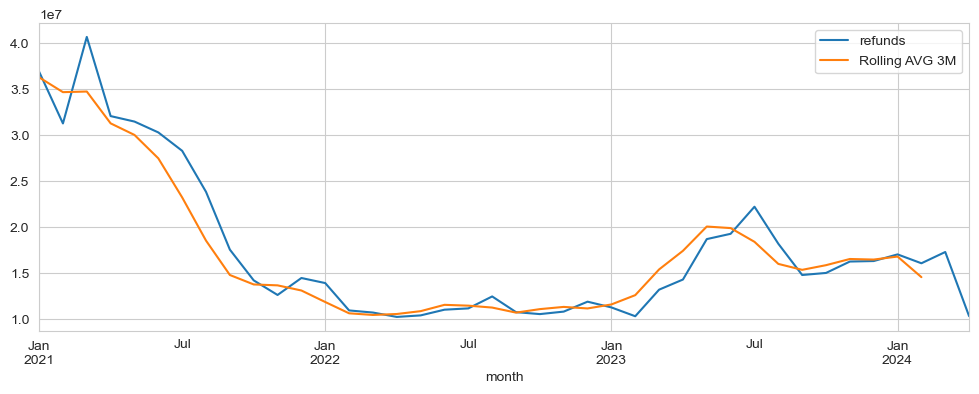

In [2]:
param = df.columns[0]

temp = df.copy()
roll_months = 3

new_col = f'Rolling AVG {roll_months}M'
temp[new_col] = temp[param].rolling(window = roll_months).mean()

sns.set_style('whitegrid')
temp.plot(figsize = (12,4));

In [3]:
from autots.models.model_list import model_lists
for m in model_lists.keys():
    print(m)

all
default
fast
superfast
parallel
fast_parallel
fast_parallel_no_arima
scalable
probabilistic
multivariate
univariate
no_params
recombination_approved
no_shared
no_shared_fast
experimental
slow
gpu
regressor
best
motifs
all_result_path
regressions
all_pragmatic
update_fit


In [4]:
model = AutoTS(
               forecast_length = 12,
               frequency = 'MS',
               prediction_interval = 0.95,
               ensemble = None,
               models_mode = 'best',
               model_list = 'univariate',
               max_generations = 15,
               num_validations = 3,
               no_negatives = True,
               n_jobs = 'auto'
              )

Using 6 cpus for n_jobs.


In [5]:
%%time

model.fit(df[param])
prediction = model.predict(forecast_length = 12)

Data frequency is: MS, used frequency is: MS
Too many training validations for length of data provided, decreasing num_validations to 1
Model Number: 1 with model ARIMA in generation 0 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.01385D+01    |proj g|=  6.31454D+00

At iterate    1    f=  1.69333D+01    |proj g|=  8.19367D-02

At iterate    2    f=  1.69216D+01    |proj g|=  6.67578D-02

At iterate    3    f=  1.69052D+01    |proj g|=  5.43578D-02

At iterate    4    f=  1.69002D+01    |proj g|=  1.92590D-02

At iterate    5    f=  1.68992D+01    |proj g|=  9.86007D-03

At iterate    6    f=  1.68986D+01    |proj g|=  1.13840D-02

At iterate    7    f=  1.68981D+01    |proj g|=  9.98575D-03

At iterate    8    f=  1.68972D+01    |proj g|=  1.09175D-02

At iterate    9    f=  1.68959D+01    |proj g|=  1.19573D-02

At iterate   10    f=

 This problem is unconstrained.


Model Number: 2 with model AverageValueNaive in generation 0 of 15
Model Number: 3 with model AverageValueNaive in generation 0 of 15
Model Number: 4 with model AverageValueNaive in generation 0 of 15
Model Number: 5 with model DatepartRegression in generation 0 of 15
Model Number: 6 with model DatepartRegression in generation 0 of 15
Model Number: 7 with model DatepartRegression in generation 0 of 15
Model Number: 8 with model DatepartRegression in generation 0 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Epoch 1/50


/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.3341
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3318
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3374
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3262
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3301
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3239
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3333
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3340
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3244
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3271
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3281
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3255
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3263
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3201
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3280
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

14:58:04 - cmdstanpy - INFO - Chain [1] start processing
14:58:04 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 27 with model DatepartRegression in generation 0 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Model Number: 28 with model SeasonalNaive in generation 0 of 15
Model Number: 29 with model DatepartRegression in generation 0 of 15
Model Number: 30 with model UnobservedComponents in generation 0 of 15
Model Number: 31 with model UnobservedComponents in generation 0 of 15
Model Number: 32 with model ETS in generation 0 of 15
Model Number: 33 with model ARDL in generation 0 of 15
Model Number: 34 with model UnivariateMotif in generation 0 of 15
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 34 in generation 0: UnivariateMotif
Model Number: 35 with model UnivariateMotif in generation 0 of 15
Template Eval Error: ValueError('kth(=5) out of bounds (3)') in model 35 in generation 0: UnivariateMotif
Model Number: 36 with model FBProphet i

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 55 with model PreprocessingRegression in generation 0 of 15
Template Eval Error: IndexError('index -962 is out of bounds for axis 0 with size 28') in model 55 in generation 0: PreprocessingRegression
Model Number: 56 with model DatepartRegression in generation 0 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 56 in generation 0: DatepartRegression
Model Number: 57 with model ConstantNaive in generation 0 of 15
Model Number: 58 with model ARDL in generation 0 of 15
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 58 in generation 0: ARDL
Model Number: 59 with model UnobservedComponents in generation 0 of 15
Model Number: 60 with model ARIMA in generation 0 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20945D+01    |p

 This problem is unconstrained.


Model Number: 65 with model MetricMotif in generation 0 of 15
Model Number: 66 with model UnivariateMotif in generation 0 of 15
Template Eval Error: ValueError('kth(=3) out of bounds (3)') in model 66 in generation 0: UnivariateMotif
Model Number: 67 with model KalmanStateSpace in generation 0 of 15
Model Number: 68 with model ETS in generation 0 of 15
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {}, '3': {}, '4': {'window_size': 90, 'alpha': 2.5, 'grouping_forward_limit': 2, 'max_level_shifts': 5, 'alignment': 'average'}, '5': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 68 in generation 0: ETS
Model Number: 69 with model MLEnsemble in generation 0 of 15
Template Eval Error: E

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 92 with model ARCH in generation 0 of 15
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 92 in generation 0: ARCH
Model Number: 93 with model Theta in generation 0 of 15
Model Number: 94 with model ConstantNaive in generation 0 of 15
Model Number: 95 with model UnivariateRegression in generation 0 of 15
Model Number: 96 with model ARDL in generation 0 of 15
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 96 in generation 0: ARDL
Model Number: 97 with model MLEnsemble in generation 0 of 15
Too many training validations for length of data provided, decreasing num_validations to -1
Template Eval Error: ValueError("forecast_length is too large for training data.\nWhat this means is you don't have enough history to support cross validation with your forecast_length.\nVarious solutions include bringing in more data, alter min_allowed_train_percent to something smaller,\nand also setting 

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 107 with model SeasonalNaive in generation 0 of 15
Model Number: 108 with model FBProphet in generation 0 of 15
Model Number: 109 with model ETS in generation 0 of 15
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params zero {'0': {'rows': 1, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': None}, '1': {}, '2': {'cutoff': 0.4, 'reverse': True}, '3': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': ['weekdaymonthofyear', 'quarter', 'dayofweek'], 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}, 'holiday_countries_used': False}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '5': {'discretization': 'lower', 'n_bins': 5}}") in model 109 in generation 0: ETS

Model Number: 116 with model MLEnsemble in generation 0 of 15
Too many training validations for length of data provided, decreasing num_validations to 0
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 116 in generation 0: MLEnsemble
Model Number: 117 with model FBProphet in generation 0 of 15
Model Number: 118 with model Theta in generation 0 of 15
Model Number: 119 with model AverageValueNaive in generation 0 of 15
Model Number: 120 with model ARCH in generation 0 of 15
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 120 in generation 0: ARCH
Model Number: 121 with model LastValueNaive in generation 0 of 15
Model Number: 122 with model GLM in generation 0 of 15
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 122

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 125 with model UnobservedComponents in generation 0 of 15
Model Number: 126 with model DatepartRegression in generation 0 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 126 in generation 0: DatepartRegression
Model Number: 127 with model FBProphet in generation 0 of 15
Model Number: 128 with model FBProphet in generation 0 of 15
Model Number: 129 with model MLEnsemble in generation 0 of 15
Template Eval Error: ValueError('num_validations/num_indices too high for this dataset') in model 129 in generation 0: MLEnsemble
Model Number: 130 with model NeuralProphet in generation 0 of 15
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 130 in generation 0: NeuralProphet
Model Number: 131 with model SeasonalNaive in generation 0 of 15
Model Number: 132 with model ARDL in generation 0 of 15
Template Eval Error: ValueError("ARDL series refunds failed with error ValueError('The number of reg

Model Number: 134 with model MetricMotif in generation 0 of 15
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 134 in generation 0: MetricMotif
Model Number: 135 with model ARIMA in generation 0 of 15
Template Eval Error: Exception("Transformer Detrend failed on fit from params time {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'method_params': {'distribution': 'uniform', 'alpha': 0.05}}}}}, '2': {}}") in model 135 in generation 0: ARIMA
Model Number: 136 with model ARDL in generation 0 of 15
Template Eval Error: ValueError("ARDL series refunds fail

Model Number: 138 with model UnobservedComponents in generation 0 of 15
Template Eval Error: Exception("Transformer Detrend failed on fit from params quadratic {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}}, '2': {'cutoff': 0.8, 'reverse': False}}") in model 138 in generation 0: UnobservedComponents
Model Number: 139 with model SeasonalityMotif in generation 0 of 15
Model Number: 140 with model ARIMA in generation 0 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.84744D+02    |proj g|=  2.30828D+04

At iterate    1    f=  5.6

 This problem is unconstrained.



At iterate    3    f=  2.94956D+00    |proj g|=  1.99620D+00

At iterate    4    f=  2.58447D+00    |proj g|=  1.21092D+00

At iterate    5    f=  2.39531D+00    |proj g|=  7.81279D-01

At iterate    6    f=  2.17365D+00    |proj g|=  3.55709D-01

At iterate    7    f=  2.03831D+00    |proj g|=  2.07397D-01

At iterate    8    f=  1.99174D+00    |proj g|=  1.28549D-01

At iterate    9    f=  1.94902D+00    |proj g|=  1.33089D-01

At iterate   10    f=  1.90675D+00    |proj g|=  1.52051D-01

At iterate   11    f=  1.88845D+00    |proj g|=  1.10871D-01

At iterate   12    f=  1.86439D+00    |proj g|=  1.34032D-01

At iterate   13    f=  1.83805D+00    |proj g|=  1.13735D-01

At iterate   14    f=  1.82823D+00    |proj g|=  8.12656D-02

At iterate   15    f=  1.82584D+00    |proj g|=  6.89503D-02

At iterate   16    f=  1.82218D+00    |proj g|=  3.49460D-02

At iterate   17    f=  1.81915D+00    |proj g|=  2.75944D-02

At iterate   18    f=  1.81770D+00    |proj g|=  3.43143D-02

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


New Generation: 1 of 15
Model Number: 158 with model UnivariateMotif in generation 1 of 15
Model Number: 159 with model SeasonalNaive in generation 1 of 15
Model Number: 160 with model GLS in generation 1 of 15
Model Number: 161 with model GLM in generation 1 of 15
Model Number: 162 with model GLS in generation 1 of 15
Model Number: 163 with model ETS in generation 1 of 15
Model Number: 164 with model UnobservedComponents in generation 1 of 15
Model Number: 165 with model LastValueNaive in generation 1 of 15
Model Number: 166 with model ARIMA in generation 1 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.75009D+01    |proj g|=  1.25280D+00


/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.



At iterate    1    f=  1.69388D+01    |proj g|=  8.77911D-02

At iterate    2    f=  1.69282D+01    |proj g|=  6.24691D-02

At iterate    3    f=  1.69108D+01    |proj g|=  3.13143D-02

At iterate    4    f=  1.69029D+01    |proj g|=  1.45063D-02

At iterate    5    f=  1.69020D+01    |proj g|=  6.92251D-03

At iterate    6    f=  1.69018D+01    |proj g|=  3.46920D-03

At iterate    7    f=  1.69018D+01    |proj g|=  7.42241D-04

At iterate    8    f=  1.69018D+01    |proj g|=  3.11563D-04

At iterate    9    f=  1.69018D+01    |proj g|=  1.71491D-04

At iterate   10    f=  1.69018D+01    |proj g|=  2.68798D-05

At iterate   11    f=  1.69018D+01    |proj g|=  5.47900D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   12    f=  2.57025D+00    |proj g|=  5.38602D-03

At iterate   13    f=  2.57013D+00    |proj g|=  1.22727D-02

At iterate   14    f=  2.57001D+00    |proj g|=  5.80252D-03

At iterate   15    f=  2.56993D+00    |proj g|=  2.80634D-03

At iterate   16    f=  2.56987D+00    |proj g|=  3.60391D-03

At iterate   17    f=  2.56980D+00    |proj g|=  3.28137D-03

At iterate   18    f=  2.56978D+00    |proj g|=  3.49074D-03

At iterate   19    f=  2.56975D+00    |proj g|=  1.95997D-03

At iterate   20    f=  2.56973D+00    |proj g|=  2.13585D-03

At iterate   21    f=  2.56971D+00    |proj g|=  2.57472D-03

At iterate   22    f=  2.56967D+00    |proj g|=  2.74847D-03

At iterate   23    f=  2.56965D+00    |proj g|=  2.38515D-03

At iterate   24    f=  2.56960D+00    |proj g|=  2.47980D-03

At iterate   25    f=  2.56950D+00    |proj g|=  3.95254D-03

At iterate   26    f=  2.56931D+00    |proj g|=  1.83970D-02

At iterate   27    f=  2.56910D+00    |proj g|=  1.20033D-02

At iter

Model Number: 188 with model DatepartRegression in generation 1 of 15
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 188 in generation 1: DatepartRegression
Model Number: 189 with model SeasonalNaive in generation 1 of 15
Model Number: 190 with model DatepartRegression in generation 1 of 15
Model Number: 191 with model KalmanStateSpace in generation 1 of 15
Model Number: 192 with model DatepartRegression in generation 1 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 192 in generation 1: DatepartRegression
Model Number: 193 with model SeasonalityMotif in generation 1 of 15
Model Number: 194 with model UnobservedComponents in generation 1 of 15
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'output_distribution': 'normal', 'n_quantiles': 20}, '1': {}, '2': {'det_order': -1, 'k_ar_diff': 1}, '3': {'a

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 196 with model Theta in generation 1 of 15
Model Number: 197 with model SeasonalityMotif in generation 1 of 15
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 197 in generation 1: SeasonalityMotif
Model Number: 198 with model UnivariateRegression in generation 1 of 15
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params nearest {'0': {'model_name': 'local linear hidden state with seasonal 12', 'state_transition': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0,

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 17752384.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17752384.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17752384.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17752384.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17752384.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17752384.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17752384.0000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17752384.0000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17752384.0000
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17752384.0000
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17752384.0000
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17752382.0000
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17752382.0000
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 17752382.0000
Epoch 15/50
1/1 

Model Number: 215 with model GLM in generation 1 of 15
Model Number: 216 with model DatepartRegression in generation 1 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 216 in generation 1: DatepartRegression
Model Number: 217 with model LastValueNaive in generation 1 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.576e+14, tolerance: 2.353e+11
  model = cd_fast.enet_coordinate_descent(
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 218 with model AverageValueNaive in generation 1 of 15
Model Number: 219 with model ARIMA in generation 1 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85803D+01    |proj g|=  1.72999D+01

At iterate    1    f=  2.22449D+01    |proj g|=  1.26047D+01

At iterate    2    f=  1.71821D+01    |proj g|=  6.88645D+00

At iterate    3    f=  1.69547D+01    |proj g|=  5.09471D+00

At iterate    4    f=  1.67534D+01    |proj g|=  1.70483D+00

At iterate    5    f=  1.66922D+01    |proj g|=  1.80611D+00

At iterate    6    f=  1.65963D+01    |proj g|=  1.73513D+00

At iterate    7    f=  1.63270D+01    |proj g|=  1.56030D+00

At iterate    8    f=  1.60367D+01    |proj g|=  2.08013D+00

At iterate    9    f=  1.59634D+01    |proj g|=  1.09683D+00

At iterate   10    f=  1.59246D+01    |proj g|=  8.72823D-01

At iterate   11    f=  1

 This problem is unconstrained.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 221 with model SeasonalityMotif in generation 1 of 15
Model Number: 222 with model ConstantNaive in generation 1 of 15
Model Number: 223 with model ETS in generation 1 of 15
Model Number: 224 with model DatepartRegression in generation 1 of 15
Epoch 1/50


/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0184
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0183
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0168
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0171
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0174
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0179
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0188
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0182
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0178
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0194
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0167
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0182
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0174
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0175
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0177
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 

Model Number: 233 with model PreprocessingRegression in generation 1 of 15
Template Eval Error: Exception('Transformer Slice failed on inverse') in model 233 in generation 1: PreprocessingRegression
Model Number: 234 with model DatepartRegression in generation 1 of 15
Model Number: 235 with model AverageValueNaive in generation 1 of 15
Model Number: 236 with model AverageValueNaive in generation 1 of 15
Model Number: 237 with model KalmanStateSpace in generation 1 of 15
Model Number: 238 with model UnivariateMotif in generation 1 of 15
Template Eval Error: ValueError('The number of observations (8) is too small; the covariance matrix is singular. For observations with 10 dimensions, at least 11 observations are required.') in model 238 in generation 1: UnivariateMotif
Model Number: 239 with model Theta in generation 1 of 15
Model Number: 240 with model DatepartRegression in generation 1 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in mo

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1098: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 251 with model UnivariateMotif in generation 1 of 15
Model Number: 252 with model LastValueNaive in generation 1 of 15
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'window': None}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}}") in model 252 in generation 1: LastValueNaive
Model Number: 253 with model UnivariateRegression in generation 1 of 15
Model Number: 254 with model Theta in generation 1 of 15
Model Number: 255 with model Theta in generation 1 of 15
Model Number: 256 with model GLM in generation 1 of 15
Model Number: 257 with model SeasonalityMotif in generation 1 of 15
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 257 in generation 1: SeasonalityMotif
Model Number: 258 with model GLS in generation 1 of 15
Template Eval Error: Exceptio

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 263 with model ConstantNaive in generation 1 of 15
Model Number: 264 with model GLM in generation 1 of 15
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params mean {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'output_distribution': 'uniform', 'n_quantiles': 9}, '2': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 2}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None, 'trend_method': 'local_linear'}}") in model 264 in generation 1: GLM
Model Number: 265 with model ConstantNaive in generation 1 of 15
Model Number: 266 with model SeasonalNaive in generation 1 of 15
Model Number: 267 with model UnivariateRegression in generation 1 of 15
Model Number: 268 with model ARIMA in generation 1 

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
 This problem is unconstrained.



At iterate   45    f=  1.73231D+01    |proj g|=  2.16590D-02

At iterate   46    f=  1.73223D+01    |proj g|=  1.98595D-02

At iterate   47    f=  1.73218D+01    |proj g|=  8.68645D-02

At iterate   48    f=  1.73208D+01    |proj g|=  2.97384D-02

At iterate   49    f=  1.73205D+01    |proj g|=  2.95951D-02

At iterate   50    f=  1.73204D+01    |proj g|=  2.25890D-02

At iterate   51    f=  1.73202D+01    |proj g|=  1.95900D-02

At iterate   52    f=  1.73184D+01    |proj g|=  5.29987D-02

At iterate   53    f=  1.73163D+01    |proj g|=  4.71492D-02

At iterate   54    f=  1.73135D+01    |proj g|=  5.37167D-02

At iterate   55    f=  1.73132D+01    |proj g|=  5.21659D-02

At iterate   56    f=  1.73120D+01    |proj g|=  1.17491D-02

At iterate   57    f=  1.73112D+01    |proj g|=  2.22380D-02

At iterate   58    f=  1.73110D+01    |proj g|=  8.81226D-02

At iterate   59    f=  1.73095D+01    |proj g|=  5.50089D-02

At iterate   60    f=  1.73089D+01    |proj g|=  1.38905D-02

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


Model Number: 273 with model FBProphet in generation 2 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 273 in generation 2: FBProphet
Model Number: 274 with model LastValueNaive in generation 2 of 15
Model Number: 275 with model MetricMotif in generation 2 of 15
Template Eval Error: ValueError('Shape of passed values is (12, 2), indices imply (12, 1)') in model 275 in generation 2: MetricMotif
Model Number: 276 with model SeasonalNaive in generation 2 of 15
Model Number: 277 with model Theta in generation 2 of 15
Model Number: 278 with model ARIMA in generation 2 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70980D+01    |proj g|=  2.88725D+00

At iterate    1    f=  1.68810D+01    |proj g|=  3.48486D+00

At iterate    2    f=  1.60391D+01    |proj g|=  6.59110D-01

At iterate    

 This problem is unconstrained.



At iterate   75    f=  1.56302D+01    |proj g|=  2.63229D-02

At iterate   76    f=  1.56302D+01    |proj g|=  1.43669D-02

At iterate   77    f=  1.56301D+01    |proj g|=  6.26964D-03

At iterate   78    f=  1.56301D+01    |proj g|=  1.28337D-02

At iterate   79    f=  1.56300D+01    |proj g|=  7.75104D-03

At iterate   80    f=  1.56300D+01    |proj g|=  1.86265D-02

At iterate   81    f=  1.56300D+01    |proj g|=  4.81890D-03

At iterate   82    f=  1.56300D+01    |proj g|=  5.01161D-03

At iterate   83    f=  1.56300D+01    |proj g|=  1.19445D-02

At iterate   84    f=  1.56300D+01    |proj g|=  1.67325D-02

At iterate   85    f=  1.56300D+01    |proj g|=  1.84173D-02

At iterate   86    f=  1.56299D+01    |proj g|=  1.42892D-02

At iterate   87    f=  1.56299D+01    |proj g|=  5.97444D-03

At iterate   88    f=  1.56299D+01    |proj g|=  1.25373D-02

At iterate   89    f=  1.56299D+01    |proj g|=  2.15985D-02

At iterate   90    f=  1.56299D+01    |proj g|=  2.34478D-02

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.81949e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 285 with model SeasonalityMotif in generation 2 of 15
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params nearest {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'fixed': True, 'window': 24, 'macro_micro': False, 'center': False}, '2': {'lag_1': 364, 'method': 2}}") in model 285 in generation 2: SeasonalityMotif
Model Number: 286 with model SeasonalityMotif in generation 2 of 15
Model Number: 287 with model UnivariateRegression in generation 2 of 15
Template Eval Error: ValueError('Input X contains NaN.\nRidge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. 

 This problem is unconstrained.



At iterate   48    f= -8.70460D-01    |proj g|=  2.11659D-02

At iterate   49    f= -8.70464D-01    |proj g|=  4.72419D-03

At iterate   50    f= -8.70466D-01    |proj g|=  8.69850D-03

At iterate   51    f= -8.70469D-01    |proj g|=  1.75552D-02

At iterate   52    f= -8.70472D-01    |proj g|=  1.10925D-02

At iterate   53    f= -8.70479D-01    |proj g|=  3.14149D-02

At iterate   54    f= -8.70491D-01    |proj g|=  1.70743D-02

At iterate   55    f= -8.70503D-01    |proj g|=  3.29511D-02

At iterate   56    f= -8.70572D-01    |proj g|=  1.03884D-01

At iterate   57    f= -8.70674D-01    |proj g|=  1.67943D-01

At iterate   58    f= -8.70878D-01    |proj g|=  2.76184D-01

At iterate   59    f= -8.71032D-01    |proj g|=  3.64094D-01

At iterate   60    f= -8.71560D-01    |proj g|=  3.09320D-01

At iterate   61    f= -8.73385D-01    |proj g|=  8.57902D-02

At iterate   62    f= -8.74178D-01    |proj g|=  3.05459D-01

At iterate   63    f= -8.74314D-01    |proj g|=  2.78687D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 300 with model FFT in generation 2 of 15
Model Number: 301 with model ETS in generation 2 of 15
Model Number: 302 with model FBProphet in generation 2 of 15
Template Eval Error: Exception("Transformer FastICA failed on fit from params mean {'0': {}, '1': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 100, 'whiten': True}}") in model 302 in generation 2: FBProphet
Model Number: 303 with model GLS in generation 2 of 15
Model Number: 304 with model DatepartRegression in generation 2 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 304 in generation 2: DatepartRegression
Model Number: 305 with model GLM in generation 2 of 15
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False}, '1': {'model': 'middle', 'decimals': 2, 'on_transform': True, 'on_inverse': False}, '2': {'rows'

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.


Model Number: 312 with model ConstantNaive in generation 2 of 15
Model Number: 313 with model FBProphet in generation 2 of 15
Model Number: 314 with model Theta in generation 2 of 15
Model Number: 315 with model FBProphet in generation 2 of 15
No anomalies detected.
Model Number: 316 with model UnobservedComponents in generation 2 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 316 in generation 2: UnobservedComponents
Model Number: 317 with model ETS in generation 2 of 15
Model Number: 318 with model UnobservedComponents in generation 2 of 15
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'method': 0.8}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}}") in

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1098: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
 This problem is unconstrained.



At iterate   15    f=  1.60018D+01    |proj g|=  1.90750D-01

At iterate   16    f=  1.59947D+01    |proj g|=  2.83947D-01

At iterate   17    f=  1.59764D+01    |proj g|=  3.88991D-01

At iterate   18    f=  1.59422D+01    |proj g|=  1.13053D-01

At iterate   19    f=  1.59293D+01    |proj g|=  2.59871D-01

At iterate   20    f=  1.59207D+01    |proj g|=  1.66876D-01

At iterate   21    f=  1.59146D+01    |proj g|=  2.73415D-01

At iterate   22    f=  1.59111D+01    |proj g|=  1.67467D-01

At iterate   23    f=  1.59085D+01    |proj g|=  3.16815D-02

At iterate   24    f=  1.59075D+01    |proj g|=  1.20822D-01

At iterate   25    f=  1.59072D+01    |proj g|=  4.08009D-02

At iterate   26    f=  1.59071D+01    |proj g|=  2.64343D-02

At iterate   27    f=  1.59068D+01    |proj g|=  4.78035D-02

At iterate   28    f=  1.59064D+01    |proj g|=  8.98268D-02

At iterate   29    f=  1.59061D+01    |proj g|=  7.06098D-02

At iterate   30    f=  1.59059D+01    |proj g|=  2.80192D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 332 with model ETS in generation 2 of 15
Model Number: 333 with model LastValueNaive in generation 2 of 15
Model Number: 334 with model GLM in generation 2 of 15
Model Number: 335 with model GLS in generation 2 of 15
Model Number: 336 with model SeasonalNaive in generation 2 of 15
Model Number: 337 with model FFT in generation 2 of 15
Model Number: 338 with model KalmanStateSpace in generation 2 of 15
Model Number: 339 with model ARIMA in generation 2 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.73810D+01    |proj g|=  2.10684D+01

At iterate    1    f=  1.74911D+01    |proj g|=  2.38506D+00

At iterate    2    f=  1.73093D+01    |proj g|=  1.84321D+00

At iterate    3    f=  1.69841D+01    |proj g|=  5.41046D-01

At iterate    4    f=  1.69500D+01    |proj g|=  4.74027D-01

At iterate    5    f=  1.68854D+01    |proj g|

 This problem is unconstrained.


Model Number: 343 with model SeasonalNaive in generation 2 of 15
Model Number: 344 with model ARDL in generation 2 of 15
Model Number: 345 with model GLS in generation 2 of 15
Model Number: 346 with model SeasonalNaive in generation 2 of 15
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill_mean_biased {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.3, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0.001, 'reg_lambda': 1, 'n_estimators': 1000}, 'datepart_method': 'expanded_binarized'}, 'fillna': 'ffill'}, '1': {'method': 'mad', 'method_params': {'distribution': 'norm', 'alpha': 0.03}, 'fillna': 'linear', 'transform_dict': None, 'isolated_only': False}, '2': {'model_name': 'X1', 'state_transition': [[1, 1, 0], [0, 1, 0], [0, 0, 1]], 'process_noise': [[0.1, 0.0, 0.0], [0.0, 0.01, 0.0], [0.0, 0.0, 0.1]], 'observation_model': [[1, 1, 1]], '

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2437
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2372
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2366
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2286
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2265
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2245
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2256
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2241
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2185
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2204
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2253
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2193
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2219
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2185
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2226
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/st

Model Number: 379 with model SeasonalNaive in generation 2 of 15
Model Number: 380 with model DatepartRegression in generation 2 of 15
Model Number: 381 with model FBProphet in generation 2 of 15
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params zero {'0': {'decimals': 1, 'on_transform': False, 'on_inverse': True}, '1': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0, 0, 0, 0, 0, 0.001, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 1, 1, 1, 1, 1, 1]], 'observation_noise': 0.03, 'em_iter': 10}, '2': {'m

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1098: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in mul

Model Number: 387 with model GLS in generation 2 of 15
New Generation: 3 of 15
Model Number: 388 with model SeasonalNaive in generation 3 of 15
Model Number: 389 with model AverageValueNaive in generation 3 of 15
Model Number: 390 with model SeasonalNaive in generation 3 of 15
Model Number: 391 with model AverageValueNaive in generation 3 of 15
Model Number: 392 with model FBProphet in generation 3 of 15
Model Number: 393 with model LastValueNaive in generation 3 of 15
Model Number: 394 with model SeasonalNaive in generation 3 of 15
Model Number: 395 with model GLS in generation 3 of 15
Model Number: 396 with model SeasonalNaive in generation 3 of 15
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'model': 'middle', 'decimals': 2, 'on_transform': False, 'on_inverse': True}, '2': {'sigma': 1, 'rolling_window': 90, 'run_order': 'seaso

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.825e+14, tolerance: 2.424e+11
  model = cd_fast.enet_coordinate_descent(


Model Number: 399 with model ARIMA in generation 3 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21143D+00    |proj g|=  3.19026D+00

At iterate    1    f=  1.04086D+00    |proj g|=  8.81703D-01

At iterate    2    f=  4.34053D-02    |proj g|=  8.89251D-01

At iterate    3    f= -3.22339D-01    |proj g|=  8.30320D-01

At iterate    4    f= -3.62873D-01    |proj g|=  5.69770D-01

At iterate    5    f= -4.39031D-01    |proj g|=  6.18409D-01

At iterate    6    f= -4.74418D-01    |proj g|=  2.33408D-01

At iterate    7    f= -4.91236D-01    |proj g|=  2.15623D-01

At iterate    8    f= -5.24485D-01    |proj g|=  1.72543D-01

At iterate    9    f= -5.44430D-01    |proj g|=  1.23369D-01

At iterate   10    f= -5.50386D-01    |proj g|=  5.69324D-02

At iterate   11    f= -5.54536D-01    |proj g|=  3.20766D-01

At iterate   12    f= -5.59988D

 This problem is unconstrained.



At iterate   22    f= -5.73974D-01    |proj g|=  1.77291D-01

At iterate   23    f= -5.74176D-01    |proj g|=  1.78070D-02

At iterate   24    f= -5.74360D-01    |proj g|=  2.60238D-02

At iterate   25    f= -5.74545D-01    |proj g|=  1.76563D-02

At iterate   26    f= -5.74640D-01    |proj g|=  4.31142D-02

At iterate   27    f= -5.74880D-01    |proj g|=  4.37315D-02

At iterate   28    f= -5.75049D-01    |proj g|=  7.53676D-02

At iterate   29    f= -5.75191D-01    |proj g|=  7.72264D-02

At iterate   30    f= -5.75437D-01    |proj g|=  2.91165D-02

At iterate   31    f= -5.75553D-01    |proj g|=  1.00418D-02

At iterate   32    f= -5.75736D-01    |proj g|=  1.87358D-02

At iterate   33    f= -5.75778D-01    |proj g|=  7.05835D-02

At iterate   34    f= -5.75829D-01    |proj g|=  3.60984D-02

At iterate   35    f= -5.75844D-01    |proj g|=  9.36154D-03

At iterate   36    f= -5.75885D-01    |proj g|=  9.56685D-03

At iterate   37    f= -5.75908D-01    |proj g|=  7.39032D-03

At iter

Model Number: 407 with model Theta in generation 3 of 15
Template Eval Error: Exception("Transformer LocalLinearTrend failed on fit from params akima {'0': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'rolling_window': 180, 'n_tails': 0.1, 'n_future': 0.05, 'method': 'median', 'macro_micro': True}, '2': {'method': 'remove', 'std_threshold': 4, 'fillna': 'ffill'}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}}") in model 407 in generation 3: Theta
Model Number: 408 with model GLS in generation 3 of 15
Model Number: 409 with model SeasonalityMotif in generation 3 of 15
Model Number: 410 with model ConstantNaive in generation 3 of 15
Model Number: 411 with model ETS in generation 3 of 15
Model Number: 412 with model GLS in generation 3 of 15
Model Number: 413 with model ARIMA in generation 3 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6    

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    7    f=  1.57619D+01    |proj g|=  1.97162D-01

At iterate    8    f=  1.57580D+01    |proj g|=  1.36977D-01

At iterate    9    f=  1.57558D+01    |proj g|=  9.72788D-02

At iterate   10    f=  1.57503D+01    |proj g|=  9.73514D-02

At iterate   11    f=  1.57474D+01    |proj g|=  8.50200D-02

At iterate   12    f=  1.57418D+01    |proj g|=  1.35254D-01

At iterate   13    f=  1.57387D+01    |proj g|=  1.33602D-01

At iterate   14    f=  1.57336D+01    |proj g|=  1.77074D-01

At iterate   15    f=  1.57161D+01    |proj g|=  3.21949D-01

At iterate   16    f=  1.57073D+01    |proj g|=  4.16725D-01

At iterate   17    f=  1.56905D+01    |proj g|=  3.71744D-01

At iterate   18    f=  1.56779D+01    |proj g|=  1.84607D-01

At iterate   19    f=  1.56752D+01    |proj g|=  2.30025D-01

At iterate   20    f=  1.56705D+01    |proj g|=  2.42842D-01

At iterate   21    f=  1.56676D+01    |proj g|=  8.43184D-02

At iterate   22    f=  1.56637D+01    |proj g|=  1.14011D-01

At iter


At iterate    3    f=  1.62284D+01    |proj g|=  3.09688D-02

At iterate    4    f=  1.62244D+01    |proj g|=  1.45812D-02

At iterate    5    f=  1.62234D+01    |proj g|=  5.38798D-03

At iterate    6    f=  1.62232D+01    |proj g|=  4.85729D-03

At iterate    7    f=  1.62230D+01    |proj g|=  4.35072D-03

At iterate    8    f=  1.62229D+01    |proj g|=  2.97077D-03

At iterate    9    f=  1.62229D+01    |proj g|=  1.51136D-03

At iterate   10    f=  1.62228D+01    |proj g|=  1.60444D-03

At iterate   11    f=  1.62228D+01    |proj g|=  2.39211D-04

At iterate   12    f=  1.62228D+01    |proj g|=  1.11316D-04

At iterate   13    f=  1.62228D+01    |proj g|=  3.74929D-05

At iterate   14    f=  1.62228D+01    |proj g|=  2.60176D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f=  2.59508D+03    |proj g|=  3.74208D+05

At iterate    3    f=  1.63080D+03    |proj g|=  1.86688D+05

At iterate    4    f=  1.11948D+03    |proj g|=  1.06352D+05

At iterate    5    f=  7.42364D+02    |proj g|=  5.75733D+04

At iterate    6    f=  4.98218D+02    |proj g|=  3.17622D+04

At iterate    7    f=  3.32111D+02    |proj g|=  1.73722D+04

At iterate    8    f=  2.21262D+02    |proj g|=  9.51376D+03

At iterate    9    f=  1.46756D+02    |proj g|=  5.19127D+03

At iterate   10    f=  9.68419D+01    |proj g|=  2.82316D+03

At iterate   11    f=  6.33923D+01    |proj g|=  1.52627D+03

At iterate   12    f=  4.10201D+01    |proj g|=  8.18071D+02

At iterate   13    f=  2.61006D+01    |proj g|=  4.32825D+02

At iterate   14    f=  1.62151D+01    |proj g|=  2.24682D+02

At iterate   15    f=  9.75061D+00    |proj g|=  1.13522D+02

At iterate   16    f=  5.62991D+00    |proj g|=  5.53084D+01

At iterate   17    f=  3.11314D+00    |proj g|=  2.56973D+01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   38    f= -3.78988D+00    |proj g|=  2.86924D+00
  ys=-3.838E-10  -gs= 5.055E-08 BFGS update SKIPPED

At iterate   39    f= -3.78988D+00    |proj g|=  2.86548D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     40    160      3     1     0   2.865D+00  -3.790D+00
  F =  -3.7898769075355019     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 420 with model LastValueNaive in generation 3 of 15
Model Number: 421 with model GLS in generation 3 of 15
Model Number: 422 with model AverageValueNaive in generation 3 of 15
Model Number: 423 with model ARDL in generation 3 of 15



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model Number: 424 with model DatepartRegression in generation 3 of 15
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.4843
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4784
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4811
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4921
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4742
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4846
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4791
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4893
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4670
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4697
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4809
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4816
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4767
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4811
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.437e+14, tolerance: 1.330e+11
  model = cd_fast.enet_coordinate_descent(


Model Number: 431 with model Theta in generation 3 of 15
Model Number: 432 with model LastValueNaive in generation 3 of 15
Model Number: 433 with model LastValueNaive in generation 3 of 15
Model Number: 434 with model GLM in generation 3 of 15
Model Number: 435 with model UnobservedComponents in generation 3 of 15
Model Number: 436 with model ARDL in generation 3 of 15
Model Number: 437 with model ARIMA in generation 3 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23988D+00    |proj g|=  6.74103D+00

At iterate    1    f=  1.10457D+00    |proj g|=  7.57362D-01

At iterate    2    f=  3.54192D-01    |proj g|=  1.96766D-01

At iterate    3    f=  3.20144D-01    |proj g|=  2.13678D-01

At iterate    4    f=  3.18157D-01    |proj g|=  1.87660D-01

At iterate    5    f=  3.04105D-01    |proj g|=  1.39597D-01

At iterate    6    f=  2.79147D

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.81949e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 This problem is unconstrained.



At iterate   14    f=  2.43144D-01    |proj g|=  4.25087D-02

At iterate   15    f=  2.42008D-01    |proj g|=  6.78331D-02

At iterate   16    f=  2.40734D-01    |proj g|=  8.37317D-02

At iterate   17    f=  2.38424D-01    |proj g|=  6.25093D-02

At iterate   18    f=  2.36344D-01    |proj g|=  1.12930D-01

At iterate   19    f=  2.35361D-01    |proj g|=  4.33620D-02

At iterate   20    f=  2.34328D-01    |proj g|=  4.05598D-02

At iterate   21    f=  2.31596D-01    |proj g|=  5.45993D-02

At iterate   22    f=  2.28033D-01    |proj g|=  8.81105D-02

At iterate   23    f=  2.26714D-01    |proj g|=  1.14717D-01

At iterate   24    f=  2.26142D-01    |proj g|=  1.07420D-01

At iterate   25    f=  2.25370D-01    |proj g|=  3.02075D-02

At iterate   26    f=  2.25026D-01    |proj g|=  1.56430D-02

At iterate   27    f=  2.23958D-01    |proj g|=  2.42843D-02

At iterate   28    f=  2.23077D-01    |proj g|=  2.71823D-02

At iterate   29    f=  2.22470D-01    |proj g|=  8.55365D-02

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 445 with model GLS in generation 3 of 15
Model Number: 446 with model FBProphet in generation 3 of 15
Model Number: 447 with model LastValueNaive in generation 3 of 15
Model Number: 448 with model FBProphet in generation 3 of 15
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params rolling_mean_24 {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False}, '2': {'lag_1': 96, 'method': 5}}") in model 448 in generation 3: FBProphet
Model Number: 449 with model SeasonalNaive in generation 3 of 15
Model Number: 450 with model DatepartRegression in generation 3 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 450 in generation 3: DatepartRegression
Model Number: 451 with model FFT in generation 3 of 15
Model Number: 452 with model GLM in generation 3 of 15
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
 This problem is unconstrained.


At iterate   23    f=  1.62455D+01    |proj g|=  4.97964D-01

At iterate   24    f=  1.62350D+01    |proj g|=  4.69873D-01

At iterate   25    f=  1.62114D+01    |proj g|=  5.40396D-01

At iterate   26    f=  1.62043D+01    |proj g|=  1.74265D-01

At iterate   27    f=  1.62019D+01    |proj g|=  2.48235D-01

At iterate   28    f=  1.61982D+01    |proj g|=  2.99339D-01

At iterate   29    f=  1.61832D+01    |proj g|=  2.20769D-01

At iterate   30    f=  1.61740D+01    |proj g|=  5.63607D-02

At iterate   31    f=  1.61687D+01    |proj g|=  5.43785D-02

At iterate   32    f=  1.61666D+01    |proj g|=  1.27093D-01

At iterate   33    f=  1.61625D+01    |proj g|=  3.22821D-02

At iterate   34    f=  1.61617D+01    |proj g|=  3.08531D-02

At iterate   35    f=  1.61609D+01    |proj g|=  7.39150D-02

At iterate   36    f=  1.61603D+01    |proj g|=  1.34231D-01

At iterate   37    f=  1.61600D+01    |proj g|=  1.94553D-02

At iterate   38    f=  1.61600D+01    |proj g|=  5.23723D-03

At itera


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 462 with model LastValueNaive in generation 3 of 15
Model Number: 463 with model Theta in generation 3 of 15
Model Number: 464 with model Theta in generation 3 of 15
Model Number: 465 with model ARIMA in generation 3 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.75674D-01    |proj g|=  3.18029D+00

At iterate    1    f=  7.16792D-01    |proj g|=  6.51471D-01

At iterate    2    f=  6.86740D-01    |proj g|=  5.51020D-01

At iterate    3    f=  6.38069D-01    |proj g|=  1.15466D-01

At iterate    4    f=  6.30501D-01    |proj g|=  2.93315D-01

At iterate    5    f=  6.23268D-01    |proj g|=  1.03991D-01

At iterate    6    f=  6.16947D-01    |proj g|=  7.32954D-02

At iterate    7    f=  6.10363D-01    |proj g|=  9.76522D-02

At iterate    8    f=  5.94297D-01    |proj g|=  1.57566D-01

At iterate    9    f=  5.87864D-01   

 This problem is unconstrained.



At iterate   70    f=  5.32334D-01    |proj g|=  9.64257D-04

At iterate   71    f=  5.32333D-01    |proj g|=  5.90408D-04

At iterate   72    f=  5.32332D-01    |proj g|=  2.06016D-03

At iterate   73    f=  5.32331D-01    |proj g|=  1.42448D-03

At iterate   74    f=  5.32330D-01    |proj g|=  1.16302D-03

At iterate   75    f=  5.32330D-01    |proj g|=  1.54640D-03

At iterate   76    f=  5.32329D-01    |proj g|=  1.40294D-03

At iterate   77    f=  5.32329D-01    |proj g|=  1.72756D-03

At iterate   78    f=  5.32328D-01    |proj g|=  1.69737D-03

At iterate   79    f=  5.32328D-01    |proj g|=  8.94704D-04

At iterate   80    f=  5.32327D-01    |proj g|=  1.56317D-03

At iterate   81    f=  5.32327D-01    |proj g|=  1.37995D-03

At iterate   82    f=  5.32327D-01    |proj g|=  3.20050D-03

At iterate   83    f=  5.32326D-01    |proj g|=  1.59843D-03

At iterate   84    f=  5.32325D-01    |proj g|=  5.74257D-04

At iterate   85    f=  5.32325D-01    |proj g|=  3.05882D-04

At iter

 This problem is unconstrained.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.4593
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4598
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4588
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4607
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4562
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4494
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4594
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4571
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4538
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4461
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4643
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4445
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4412
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4507
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4475
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9

 This problem is unconstrained.



At iterate  124    f= -1.20822D+00    |proj g|=  1.22935D-02

At iterate  125    f= -1.20822D+00    |proj g|=  3.87193D-02

At iterate  126    f= -1.20823D+00    |proj g|=  3.35506D-02

At iterate  127    f= -1.20824D+00    |proj g|=  1.54312D-02

At iterate  128    f= -1.20824D+00    |proj g|=  1.39288D-02

At iterate  129    f= -1.20824D+00    |proj g|=  1.71872D-02

At iterate  130    f= -1.20824D+00    |proj g|=  1.14650D-02

At iterate  131    f= -1.20825D+00    |proj g|=  3.38827D-02

At iterate  132    f= -1.20825D+00    |proj g|=  3.56684D-02

At iterate  133    f= -1.20825D+00    |proj g|=  5.27037D-03

At iterate  134    f= -1.20825D+00    |proj g|=  1.16961D-02

At iterate  135    f= -1.20825D+00    |proj g|=  3.24751D-03

At iterate  136    f= -1.20825D+00    |proj g|=  3.30088D-03

At iterate  137    f= -1.20825D+00    |proj g|=  6.15690D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1098: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-condition

Model Number: 499 with model ETS in generation 3 of 15
Model Number: 500 with model ETS in generation 3 of 15
Model Number: 501 with model AverageValueNaive in generation 3 of 15
Model Number: 502 with model KalmanStateSpace in generation 3 of 15
New Generation: 4 of 15
Model Number: 503 with model Theta in generation 4 of 15
Template Eval Error: Exception("Transformer BTCD failed on fit from params fake_date {'0': {'decimals': 1, 'on_transform': True, 'on_inverse': True}, '1': {'fixed': True, 'window': 24, 'macro_micro': False, 'center': True}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '3': {}}") in model 503 in generation 4: Theta
Model Number: 504 with model SeasonalNaive in generation 4 of 15
Model Number: 505 with model LastValueNaive in generation 4 of 15
Model Number: 506 with model GLS in generation 4 of 15
Model Number: 507 with model FBProphet in generation 4 of 15
No anomalies detected.
Model Number: 508 with model KalmanSta

 This problem is unconstrained.


Model Number: 531 with model GLS in generation 4 of 15
Model Number: 532 with model ARDL in generation 4 of 15
Model Number: 533 with model PreprocessingRegression in generation 4 of 15
Model Number: 534 with model ARDL in generation 4 of 15
Model Number: 535 with model Theta in generation 4 of 15
Model Number: 536 with model AverageValueNaive in generation 4 of 15
Model Number: 537 with model GLM in generation 4 of 15
Model Number: 538 with model KalmanStateSpace in generation 4 of 15
Model Number: 539 with model LastValueNaive in generation 4 of 15
Model Number: 540 with model Theta in generation 4 of 15
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'lag_1': 7, 'method': 'Mean'}, '1': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 0.7, 'first_value_only': True}, '2': {'output_distribution': 'uniform', 'n_quantiles': 9}, '3': {'lag_1': 7, 'method': 'Mean'}}") in model 540 in generation 4: Theta
Model Number: 54

 This problem is unconstrained.



At iterate   67    f=  1.58621D+01    |proj g|=  1.19417D-01

At iterate   68    f=  1.58607D+01    |proj g|=  6.47229D-01

At iterate   69    f=  1.58582D+01    |proj g|=  1.65030D-02

At iterate   70    f=  1.58576D+01    |proj g|=  2.90945D-02

At iterate   71    f=  1.58567D+01    |proj g|=  1.19467D-01

At iterate   72    f=  1.58564D+01    |proj g|=  2.26132D-02

At iterate   73    f=  1.58563D+01    |proj g|=  2.78645D-02

At iterate   74    f=  1.58562D+01    |proj g|=  4.45171D-02

At iterate   75    f=  1.58561D+01    |proj g|=  6.08568D-02

At iterate   76    f=  1.58559D+01    |proj g|=  6.50792D-02

At iterate   77    f=  1.58557D+01    |proj g|=  2.67262D-02

At iterate   78    f=  1.58555D+01    |proj g|=  5.10521D-02

At iterate   79    f=  1.58551D+01    |proj g|=  3.30512D-02

At iterate   80    f=  1.58548D+01    |proj g|=  1.65985D-01

At iterate   81    f=  1.58544D+01    |proj g|=  9.97999D-02

At iterate   82    f=  1.58531D+01    |proj g|=  2.17692D-02

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.4918
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4919
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4889
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4798
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4781
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4834
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4809
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4916
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4853
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4774
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4738
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4776
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4799
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4842
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4778
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - l

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.81949e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 This problem is unconstrained.



At iterate   37    f=  1.61601D+01    |proj g|=  1.19674D-02

At iterate   38    f=  1.61600D+01    |proj g|=  5.34853D-03

At iterate   39    f=  1.61600D+01    |proj g|=  3.37027D-02

At iterate   40    f=  1.61599D+01    |proj g|=  1.61027D-02

At iterate   41    f=  1.61598D+01    |proj g|=  1.36226D-02

At iterate   42    f=  1.61597D+01    |proj g|=  3.58166D-02

At iterate   43    f=  1.61595D+01    |proj g|=  6.14280D-02

At iterate   44    f=  1.61591D+01    |proj g|=  8.05812D-02

At iterate   45    f=  1.61584D+01    |proj g|=  7.72645D-02

At iterate   46    f=  1.61583D+01    |proj g|=  5.80823D-02

At iterate   47    f=  1.61576D+01    |proj g|=  1.95028D-02

At iterate   48    f=  1.61568D+01    |proj g|=  1.23561D-01

At iterate   49    f=  1.61565D+01    |proj g|=  7.49561D-02

At iterate   50    f=  1.61558D+01    |proj g|=  9.72702D-02

At iterate   51    f=  1.61556D+01    |proj g|=  7.09789D-02

At iterate   52    f=  1.61553D+01    |proj g|=  2.33225D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  1.72158D+01    |proj g|=  1.55418D+00

At iterate    6    f=  1.69834D+01    |proj g|=  1.55073D+00

At iterate    7    f=  1.69396D+01    |proj g|=  1.24580D+00

At iterate    8    f=  1.69104D+01    |proj g|=  5.42325D-01

At iterate    9    f=  1.68934D+01    |proj g|=  4.87972D-01

At iterate   10    f=  1.68563D+01    |proj g|=  5.50299D-01

At iterate   11    f=  1.68326D+01    |proj g|=  5.83870D-01

At iterate   12    f=  1.68016D+01    |proj g|=  7.04492D-01

At iterate   13    f=  1.67731D+01    |proj g|=  8.79593D-01

At iterate   14    f=  1.67277D+01    |proj g|=  9.80541D-01

At iterate   15    f=  1.66567D+01    |proj g|=  8.39757D-01

At iterate   16    f=  1.66052D+01    |proj g|=  7.34037D-01

At iterate   17    f=  1.65949D+01    |proj g|=  4.97369D-01

At iterate   18    f=  1.65695D+01    |proj g|=  4.31412D-01

At iterate   19    f=  1.65199D+01    |proj g|=  5.41970D-01

At iterate   20    f=  1.64840D+01    |proj g|=  4.16751D-01

At iter

 This problem is unconstrained.



At iterate   32    f= -1.19963D-01    |proj g|=  1.34701D-02

At iterate   33    f= -1.20105D-01    |proj g|=  1.68738D-02

At iterate   34    f= -1.20440D-01    |proj g|=  2.27090D-02

At iterate   35    f= -1.21436D-01    |proj g|=  7.92254D-02

At iterate   36    f= -1.21752D-01    |proj g|=  3.22337D-02

At iterate   37    f= -1.22234D-01    |proj g|=  2.31899D-02

At iterate   38    f= -1.22622D-01    |proj g|=  1.81913D-02

At iterate   39    f= -1.23103D-01    |proj g|=  3.35754D-02

At iterate   40    f= -1.23303D-01    |proj g|=  1.72654D-02

At iterate   41    f= -1.23324D-01    |proj g|=  1.16789D-01

At iterate   42    f= -1.23503D-01    |proj g|=  1.27796D-02

At iterate   43    f= -1.23534D-01    |proj g|=  8.40920D-03

At iterate   44    f= -1.23586D-01    |proj g|=  9.66203D-03

At iterate   45    f= -1.23636D-01    |proj g|=  9.32195D-03

At iterate   46    f= -1.23656D-01    |proj g|=  7.75623D-03

At iterate   47    f= -1.23678D-01    |proj g|=  1.06243D-02

At iter

Model Number: 592 with model LastValueNaive in generation 4 of 15
Model Number: 593 with model ETS in generation 4 of 15
Model Number: 594 with model GLS in generation 4 of 15
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'part': 'trend', 'lamb': 1600}, '1': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 9, 'min_samples_split': 1.0}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'holiday_countries_used': False}, 'holiday_params': None, 'trend_method': 'local_linear'}, '2': {'part': 'trend', 'lamb': 1600}}") in model 594 in generation 4: GLS
Model Number: 595 with model FBProphet in generation 4 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor pas


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 603 with model ARDL in generation 4 of 15
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 603 in generation 4: ARDL
Model Number: 604 with model FBProphet in generation 4 of 15
Model Number: 605 with model FBProphet in generation 4 of 15
Model Number: 606 with model SeasonalNaive in generation 4 of 15
Model Number: 607 with model ARIMA in generation 4 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.98051D+01    |proj g|=  2.42649D+01

At iterate    1    f=  1.91120D+01    |proj g|=  9.27323D+00

At iterate    2    f=  1.89942D+01    |proj g|=  7.21141D-01

At iterate    3    f=  1.89932D+01    |proj g|=  5.24917D-01

At iterate    4    f=  1.89909D+01    |proj g|=  8.78477D-01

At iterate    5    f=  1.89835D+01    |proj g|=  2.17502D+00

At iterate    6    f=  1.89649D+0

 This problem is unconstrained.



At iterate   57    f=  1.44659D+01    |proj g|=  2.05381D+00

At iterate   58    f=  1.44652D+01    |proj g|=  4.49050D+00

At iterate   59    f=  1.44643D+01    |proj g|=  2.31620D+00

At iterate   60    f=  1.44628D+01    |proj g|=  1.00078D+00

At iterate   61    f=  1.44614D+01    |proj g|=  1.90437D+00

At iterate   62    f=  1.44597D+01    |proj g|=  4.03233D+00

At iterate   63    f=  1.44583D+01    |proj g|=  8.54545D-01

At iterate   64    f=  1.44577D+01    |proj g|=  2.29169D+00

At iterate   65    f=  1.44572D+01    |proj g|=  1.47943D+00

At iterate   66    f=  1.44555D+01    |proj g|=  1.06154D+00

At iterate   67    f=  1.44538D+01    |proj g|=  3.24763D+00

At iterate   68    f=  1.44518D+01    |proj g|=  9.35958D-01

At iterate   69    f=  1.44502D+01    |proj g|=  3.25616D+00

At iterate   70    f=  1.44490D+01    |proj g|=  4.41378D-01

At iterate   71    f=  1.44480D+01    |proj g|=  3.75820D+00

At iterate   72    f=  1.44473D+01    |proj g|=  2.21425D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model Number: 612 with model UnivariateRegression in generation 4 of 15
Template Eval Error: Exception("Transformer FastICA failed on fit from params fake_date {'0': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 500, 'whiten': True}, '1': {'fixed': False, 'window': 7, 'macro_micro': False, 'center': False}}") in model 612 in generation 4: UnivariateRegression
Model Number: 613 with model DatepartRegression in generation 4 of 15
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 21371474.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21371474.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21371474.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21371474.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21371474.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21371474.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21371474.0000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21371474.00

Model Number: 627 with model AverageValueNaive in generation 5 of 15
Model Number: 628 with model ETS in generation 5 of 15
Model Number: 629 with model GLS in generation 5 of 15
Model Number: 630 with model ARIMA in generation 5 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52787D+01    |proj g|=  3.88700D-01

At iterate    1    f=  1.52372D+01    |proj g|=  7.68971D-02

At iterate    2    f=  1.52341D+01    |proj g|=  5.89486D-02

At iterate    3    f=  1.52287D+01    |proj g|=  2.29242D-02

At iterate    4    f=  1.52286D+01    |proj g|=  2.06511D-02

At iterate    5    f=  1.52285D+01    |proj g|=  2.28370D-03

At iterate    6    f=  1.52285D+01    |proj g|=  1.34398D-03

At iterate    7    f=  1.52285D+01    |proj g|=  4.02231D-05

At iterate    8    f=  1.52285D+01    |proj g|=  4.91198D-06

           * * *

Tit   = total number

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1196: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:173: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
 This problem is unconstrained.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Dual

Model Number: 637 with model ARIMA in generation 5 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10509D-01    |proj g|=  2.56904D+02

At iterate    1    f= -1.08418D-01    |proj g|=  2.67570D+00

At iterate    2    f= -1.47708D+00    |proj g|=  8.34803D+00

At iterate    3    f= -1.50390D+00    |proj g|=  1.54474D+00

At iterate    4    f= -1.51004D+00    |proj g|=  7.54488D-01

At iterate    5    f= -1.53558D+00    |proj g|=  6.20022D+00

At iterate    6    f= -1.66218D+00    |proj g|=  5.00339D+00

At iterate    7    f= -1.86461D+00    |proj g|=  1.25504D+01

At iterate    8    f= -2.01394D+00    |proj g|=  5.35668D+00

At iterate    9    f= -2.02356D+00    |proj g|=  4.03445D+00

At iterate   10    f= -2.02962D+00    |proj g|=  1.49188D+00

At iterate   11    f= -2.03218D+00    |proj g|=  8.60232D-01

At iterate   12    f= -2.03442D

At iterate  141    f= -2.30431D+00    |proj g|=  1.46859D-02

At iterate  142    f= -2.30431D+00    |proj g|=  2.87526D-02

At iterate  143    f= -2.30431D+00    |proj g|=  1.06405D-02

At iterate  144    f= -2.30431D+00    |proj g|=  4.55758D-03

At iterate  145    f= -2.30431D+00    |proj g|=  8.79440D-03

At iterate  146    f= -2.30431D+00    |proj g|=  4.51901D-02

At iterate  147    f= -2.30431D+00    |proj g|=  1.81876D-02

At iterate  148    f= -2.30431D+00    |proj g|=  7.43414D-03

At iterate  149    f= -2.30431D+00    |proj g|=  1.01345D-02

At iterate  150    f= -2.30431D+00    |proj g|=  1.09536D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)


Model Number: 641 with model KalmanStateSpace in generation 5 of 15
Model Number: 642 with model ARDL in generation 5 of 15
Model Number: 643 with model FBProphet in generation 5 of 15
Model Number: 644 with model AverageValueNaive in generation 5 of 15
Model Number: 645 with model PreprocessingRegression in generation 5 of 15
Model Number: 646 with model KalmanStateSpace in generation 5 of 15
Model Number: 647 with model UnivariateRegression in generation 5 of 15
Model Number: 648 with model LastValueNaive in generation 5 of 15
Model Number: 649 with model FBProphet in generation 5 of 15
Model Number: 650 with model ARIMA in generation 5 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60351D+01    |proj g|=  1.69544D+02

At iterate    1    f=  3.20278D+01    |proj g|=  1.39715D+02

At iterate    2    f=  1.79224D+01    |proj g|=  3.8026

 This problem is unconstrained.


At iterate   24    f=  1.26641D+01    |proj g|=  8.64068D-01

At iterate   25    f=  1.26588D+01    |proj g|=  1.04057D+00

At iterate   26    f=  1.26578D+01    |proj g|=  5.21411D-01

At iterate   27    f=  1.26569D+01    |proj g|=  3.34738D-01

At iterate   28    f=  1.26565D+01    |proj g|=  5.10299D-01

At iterate   29    f=  1.26552D+01    |proj g|=  1.02039D+00

At iterate   30    f=  1.26535D+01    |proj g|=  1.35385D+00

At iterate   31    f=  1.26500D+01    |proj g|=  1.61661D+00

At iterate   32    f=  1.26443D+01    |proj g|=  1.40607D+00

At iterate   33    f=  1.26291D+01    |proj g|=  1.52255D+00

At iterate   34    f=  1.25617D+01    |proj g|=  4.49477D+00

At iterate   35    f=  1.25609D+01    |proj g|=  4.29841D+00

At iterate   36    f=  1.25034D+01    |proj g|=  4.08846D+00

At iterate   37    f=  1.24805D+01    |proj g|=  3.23108D+00

At iterate   38    f=  1.24636D+01    |proj g|=  2.92172D+00

At iterate   39    f=  1.24492D+01    |proj g|=  8.97190D-01

At itera


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    4    f=  5.17309D-01    |proj g|=  3.59666D-01

At iterate    5    f=  4.87645D-01    |proj g|=  8.02372D-02

At iterate    6    f=  4.79982D-01    |proj g|=  6.96640D-02

At iterate    7    f=  4.67399D-01    |proj g|=  1.37347D-01

At iterate    8    f=  4.60238D-01    |proj g|=  5.33284D-02

At iterate    9    f=  4.55387D-01    |proj g|=  4.76910D-02

At iterate   10    f=  4.46665D-01    |proj g|=  6.21404D-02

At iterate   11    f=  4.40470D-01    |proj g|=  1.25763D-01

At iterate   12    f=  4.33839D-01    |proj g|=  1.80802D-01

At iterate   13    f=  4.31223D-01    |proj g|=  1.33404D-01

At iterate   14    f=  4.29482D-01    |proj g|=  3.25988D-02

At iterate   15    f=  4.28503D-01    |proj g|=  6.44303D-02

At iterate   16    f=  4.27387D-01    |proj g|=  3.87884D-02

At iterate   17    f=  4.26480D-01    |proj g|=  5.70894D-02

At iterate   18    f=  4.24910D-01    |proj g|=  7.19761D-02

At iterate   19    f=  4.24016D-01    |proj g|=  6.20237D-02

At iter


At iterate   11    f= -0.00000D+00    |proj g|=  5.45337D+07


 This problem is unconstrained.


Model Number: 664 with model AverageValueNaive in generation 5 of 15
Model Number: 665 with model DatepartRegression in generation 5 of 15
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 665 in generation 5: DatepartRegression
Model Number: 666 with model LastValueNaive in generation 5 of 15
Model Number: 667 with model FBProphet in generation 5 of 15
Model Number: 668 with model ARIMA in generation 5 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.69600D+00    |proj g|=  1.66032D-01

At iterate    1    f=  1.51285D+00    |proj g|=  4.94418D-02

At iterate    2    f=  1.51240D+00    |proj g|=  3.53872D-02

At iterate    3    f=  1.51205D+00    |proj g|=  2.46862D-03

At iterate    4    f=  1.51204D+00    |proj g|=  1.13360D-04

At iterate    5    f=  1.51


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
 This problem is unconstrained.


Model Number: 671 with model FBProphet in generation 5 of 15
Model Number: 672 with model FFT in generation 5 of 15
Model Number: 673 with model ARIMA in generation 5 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85629D+01    |proj g|=  2.88560D+00

At iterate    1    f=  1.74928D+01    |proj g|=  2.37850D+00

At iterate    2    f=  1.71129D+01    |proj g|=  1.71986D+00

At iterate    3    f=  1.69093D+01    |proj g|=  1.03580D+00

At iterate    4    f=  1.68459D+01    |proj g|=  1.58483D+00

At iterate    5    f=  1.67926D+01    |proj g|=  4.04078D-01

At iterate    6    f=  1.67702D+01    |proj g|=  2.90669D-01

At iterate    7    f=  1.67290D+01    |proj g|=  3.14611D-01

At iterate    8    f=  1.66869D+01    |proj g|=  4.26657D-01

At iterate    9    f=  1.66605D+01    |proj g|=  5.65964D-01

At iterate   10    f=  1.66245D+01    |

 This problem is unconstrained.



At iterate   46    f=  1.61583D+01    |proj g|=  5.80823D-02

At iterate   47    f=  1.61576D+01    |proj g|=  1.95028D-02

At iterate   48    f=  1.61568D+01    |proj g|=  1.23561D-01

At iterate   49    f=  1.61565D+01    |proj g|=  7.49561D-02

At iterate   50    f=  1.61558D+01    |proj g|=  9.72702D-02

At iterate   51    f=  1.61556D+01    |proj g|=  7.09789D-02

At iterate   52    f=  1.61553D+01    |proj g|=  2.33225D-02

At iterate   53    f=  1.61550D+01    |proj g|=  3.21772D-02

At iterate   54    f=  1.61544D+01    |proj g|=  3.52085D-02

At iterate   55    f=  1.61541D+01    |proj g|=  8.02619D-02

At iterate   56    f=  1.61533D+01    |proj g|=  5.84585D-03

At iterate   57    f=  1.61530D+01    |proj g|=  5.60565D-02

At iterate   58    f=  1.61527D+01    |proj g|=  5.50637D-02

At iterate   59    f=  1.61525D+01    |proj g|=  7.95423D-02

At iterate   60    f=  1.61523D+01    |proj g|=  4.00731D-02

At iterate   61    f=  1.61520D+01    |proj g|=  1.53443D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 681 with model Theta in generation 5 of 15
Model Number: 682 with model KalmanStateSpace in generation 5 of 15
Model Number: 683 with model ConstantNaive in generation 5 of 15
Model Number: 684 with model FFT in generation 5 of 15
Model Number: 685 with model ARIMA in generation 5 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22196D+01    |proj g|=  8.94144D+00

At iterate    1    f=  1.81315D+01    |proj g|=  5.34469D+00

At iterate    2    f=  1.69748D+01    |proj g|=  3.41485D+00

At iterate    3    f=  1.67445D+01    |proj g|=  2.35665D+00

At iterate    4    f=  1.66444D+01    |proj g|=  1.51100D+00

At iterate    5    f=  1.64963D+01    |proj g|=  1.17902D+00

At iterate    6    f=  1.63578D+01    |proj g|=  1.00959D+00

At iterate    7    f=  1.62369D+01    |proj g|=  8.19399D-01

At iterate    8    f=  1.61398D+01

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 689 with model KalmanStateSpace in generation 5 of 15
Model Number: 690 with model LastValueNaive in generation 5 of 15
Model Number: 691 with model SeasonalNaive in generation 5 of 15
Model Number: 692 with model ARIMA in generation 5 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.69010D-01    |proj g|=  1.70045D+00

At iterate    1    f=  4.07615D-01    |proj g|=  2.16185D-01

At iterate    2    f=  3.82518D-01    |proj g|=  1.52125D-01

At iterate    3    f=  3.63388D-01    |proj g|=  3.54649D-01

At iterate    4    f=  3.57081D-01    |proj g|=  1.08552D-01

At iterate    5    f=  3.53022D-01    |proj g|=  7.45855D-02

At iterate    6    f=  3.51157D-01    |proj g|=  1.24768D-01

At iterate    7    f=  3.46772D-01    |proj g|=  1.54603D-01

At iterate    8    f=  3.40850D-01    |proj g|=  1.51438D-01

At iterate    9   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 698 with model UnobservedComponents in generation 5 of 15
Model Number: 699 with model PreprocessingRegression in generation 5 of 15
Model Number: 700 with model SeasonalNaive in generation 5 of 15
Model Number: 701 with model AverageValueNaive in generation 5 of 15
Model Number: 702 with model SeasonalityMotif in generation 5 of 15
Model Number: 703 with model ARIMA in generation 5 of 15
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 703 in generation 5: ARIMA
Model Number: 704 with model AverageValueNaive in generation 5 of 15
Model Number: 705 with model UnobservedComponents in generation 5 of 15
Template Eval Error: Exception("Transformer Cointegration failed on fit from params time {'0': {}, '1': {}, '2': {'det_order': 1, 'k_ar_diff': 0}, '3': {}, '4': {}}") in model 705 in generation 5: UnobservedComponents
Model Number: 706 with model ARIMA in generation 5 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machi

 This problem is unconstrained.


New Generation: 6 of 15
Model Number: 710 with model UnivariateRegression in generation 6 of 15
Model Number: 711 with model UnivariateRegression in generation 6 of 15
Model Number: 712 with model ETS in generation 6 of 15
Template Eval Error: Exception("Transformer FastICA failed on fit from params mean {'0': {'algorithm': 'parallel', 'fun': 'logcosh', 'max_iter': 250, 'whiten': True}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4}}}}}") in model 712 in generation 6: ETS
Model Number: 713 with model SeasonalNaive in generation 6 of 15
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'pchip', 'transformations': {'0': 'LocalLinearTrend', '1': 'RollingMeanTransformer'}, 'transformation_params': {'0': {'rolling_window': 0.1, 'n_tails': 30, 'n_future': 0.2, 'method': 'median', 'macro_micro': Fals

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.034e+15, tolerance: 2.483e+11
  model = cd_fast.enet_coordinate_descent(
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.81949e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 727 with model FFT in generation 6 of 15
Model Number: 728 with model LastValueNaive in generation 6 of 15
Model Number: 729 with model GLS in generation 6 of 15
Model Number: 730 with model UnobservedComponents in generation 6 of 15
Model Number: 731 with model UnobservedComponents in generation 6 of 15
Model Number: 732 with model ARDL in generation 6 of 15
Template Eval Error: ValueError("ARDL series refunds failed with error ValueError('The number of regressors (6) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (5).') exog train             HolidayFlag_US\nmonth                     \n2022-09-01             0.0\n2022-10-01             0.0\n2022-11-01             0.0\n2022-12-01             0.0\n2023-01-01             1.0\n2023-02-01             0.0\n2023-03-01             0.0\n2023-04-01             0.0 and predict             HolidayFlag_US\n2023-05-01             0.0\n2023-06

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   15    f= -2.64506D+00    |proj g|=  1.15119D+00

At iterate   16    f= -2.64539D+00    |proj g|=  2.50004D-01

At iterate   17    f= -2.64544D+00    |proj g|=  2.52985D-01

At iterate   18    f= -2.64555D+00    |proj g|=  5.82391D-01

At iterate   19    f= -2.64579D+00    |proj g|=  1.06555D+00

At iterate   20    f= -2.64734D+00    |proj g|=  3.39935D+00

At iterate   21    f= -2.64904D+00    |proj g|=  4.45930D+00

At iterate   22    f= -2.66138D+00    |proj g|=  9.01754D+00

At iterate   23    f= -2.67249D+00    |proj g|=  7.61430D+00

At iterate   24    f= -2.67437D+00    |proj g|=  8.12876D-02

At iterate   25    f= -2.67722D+00    |proj g|=  1.51314D-01

At iterate   26    f= -2.67817D+00    |proj g|=  3.34243D+00

At iterate   27    f= -2.67986D+00    |proj g|=  3.63057D+00

At iterate   28    f= -2.68991D+00    |proj g|=  5.53964D+00

At iterate   29    f= -2.70435D+00    |proj g|=  5.62970D+00

At iterate   30    f= -2.72061D+00    |proj g|=  1.28243D+01

At itera


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


Model Number: 750 with model ARIMA in generation 6 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.74231D+00    |proj g|=  5.82340D+01

At iterate    1    f=  1.04624D+00    |proj g|=  7.90085D-01

At iterate    2    f=  2.96828D-01    |proj g|=  1.85749D-01

At iterate    3    f=  2.90514D-01    |proj g|=  4.57581D-01

At iterate    4    f=  2.63646D-01    |proj g|=  2.47209D-01

At iterate    5    f=  2.59393D-01    |proj g|=  5.54515D-02

At iterate    6    f=  2.57397D-01    |proj g|=  1.17691D-01

At iterate    7    f=  2.53743D-01    |proj g|=  1.44388D-01

At iterate    8    f=  2.49285D-01    |proj g|=  1.85338D-01

At iterate    9    f=  2.46492D-01    |proj g|=  2.30108D-02

At iterate   10    f=  2.45839D-01    |proj g|=  2.93145D-02

At iterate   11    f=  2.45391D-01    |proj g|=  2.78851D-02

At iterate   12    f=  2.44509D

 This problem is unconstrained.


te   36    f=  2.22593D-01    |proj g|=  1.00491D-01

At iterate   37    f=  2.20892D-01    |proj g|=  3.50195D-01

At iterate   38    f=  2.16205D-01    |proj g|=  2.73764D-01

At iterate   39    f=  2.14365D-01    |proj g|=  4.47514D-02

At iterate   40    f=  2.14185D-01    |proj g|=  6.92611D-02

At iterate   41    f=  2.13808D-01    |proj g|=  5.18943D-02

At iterate   42    f=  2.13332D-01    |proj g|=  4.39895D-02

At iterate   43    f=  2.12745D-01    |proj g|=  5.39789D-02

At iterate   44    f=  2.12087D-01    |proj g|=  1.45779D-02

At iterate   45    f=  2.11491D-01    |proj g|=  3.32527D-02

At iterate   46    f=  2.10950D-01    |proj g|=  2.63593D-02

At iterate   47    f=  2.09666D-01    |proj g|=  2.58235D-02

At iterate   48    f=  2.08991D-01    |proj g|=  7.28801D-02

At iterate   49    f=  2.08074D-01    |proj g|=  3.04004D-02

At iterate   50    f=  2.07768D-01    |proj g|=  1.72030D-02

At iterate   51    f=  2.07649D-01    |proj g|=  1.31732D-02

At iterate   52 

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
 This problem is unconstrained.


Model Number: 758 with model AverageValueNaive in generation 6 of 15
Model Number: 759 with model ARIMA in generation 6 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.58412D+00    |proj g|=  8.56028D+01

At iterate    1    f=  1.05237D+00    |proj g|=  8.00655D-01

At iterate    2    f=  2.97374D-01    |proj g|=  1.34352D-01

At iterate    3    f=  2.94490D-01    |proj g|=  1.89316D-01

At iterate    4    f=  2.88960D-01    |proj g|=  4.39722D-02

At iterate    5    f=  2.81779D-01    |proj g|=  7.13526D-02

At iterate    6    f=  2.74958D-01    |proj g|=  8.23579D-02

At iterate    7    f=  2.67019D-01    |proj g|=  4.85417D-02

At iterate    8    f=  2.57461D-01    |proj g|=  5.02391D-02

At iterate    9    f=  2.54120D-01    |proj g|=  4.90607D-02

At iterate   10    f=  2.50123D-01    |proj g|=  5.12357D-02

At iterate   11    f=  2


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


Model Number: 762 with model UnobservedComponents in generation 6 of 15
Model Number: 763 with model GLS in generation 6 of 15
Model Number: 764 with model SeasonalityMotif in generation 6 of 15
Model Number: 765 with model ARDL in generation 6 of 15
Model Number: 766 with model LastValueNaive in generation 6 of 15
Model Number: 767 with model UnivariateMotif in generation 6 of 15
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'method': 100}, '2': {}, '3': {}, '4': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 0.9, 'first_value_only': True}, '5': {}}") in model 767 in generation 6: UnivariateMotif
Model Number: 768 with model PreprocessingRegression in generation 6 of 15
Model Number: 769 with model ARDL in generation 6 of 15
Model Number: 770 with model GLS in generation 6 of 15
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 775 with model GLM in generation 6 of 15
Template Eval Error: Exception("Transformer Cointegration failed on fit from params mean {'0': {'det_order': -1, 'k_ar_diff': 1}, '1': {}, '2': {'lag_1': 12, 'method': 20}}") in model 775 in generation 6: GLM
Model Number: 776 with model GLM in generation 6 of 15
Model Number: 777 with model LastValueNaive in generation 6 of 15
Model Number: 778 with model AverageValueNaive in generation 6 of 15
Model Number: 779 with model ARIMA in generation 6 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.31078D+00    |proj g|=  3.76849D+00

At iterate    1    f= -1.33037D+00    |proj g|=  5.31550D+00

At iterate    2    f= -1.38017D+00    |proj g|=  3.00120D+00

At iterate    3    f= -1.39709D+00    |proj g|=  5.80292D-01

At iterate    4    f= -1.40152D+00    |proj g|=  7.50885D-01

At iterate 

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.



At iterate   57    f= -1.79515D+00    |proj g|=  2.18596D-01

At iterate   58    f= -1.79539D+00    |proj g|=  3.00586D-01

At iterate   59    f= -1.79544D+00    |proj g|=  8.04940D-02

At iterate   60    f= -1.79552D+00    |proj g|=  1.39428D-01

At iterate   61    f= -1.79575D+00    |proj g|=  6.42375D-02

At iterate   62    f= -1.79578D+00    |proj g|=  1.14925D-02

At iterate   63    f= -1.79578D+00    |proj g|=  4.47694D-02

At iterate   64    f= -1.79579D+00    |proj g|=  3.49267D-02

At iterate   65    f= -1.79580D+00    |proj g|=  8.22436D-02

At iterate   66    f= -1.79580D+00    |proj g|=  4.80583D-02

At iterate   67    f= -1.79581D+00    |proj g|=  2.71746D-02

At iterate   68    f= -1.79581D+00    |proj g|=  2.56732D-02

At iterate   69    f= -1.79582D+00    |proj g|=  2.36860D-02

At iterate   70    f= -1.79584D+00    |proj g|=  1.07762D-02

At iterate   71    f= -1.79584D+00    |proj g|=  7.16407D-02

At iterate   72    f= -1.79585D+00    |proj g|=  1.20183D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 791 with model ARDL in generation 6 of 15
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params fake_date {'0': {'center': 'mean'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': True}}") in model 791 in generation 6: ARDL
Model Number: 792 with model FBProphet in generation 6 of 15
Model Number: 793 with model SeasonalNaive in generation 6 of 15
Model Number: 794 with model UnivariateMotif in generation 6 of 15
Template Eval Error: ValueError('kth(=10) out of bounds (7)') in model 794 in generation 6: UnivariateMotif
Model Number: 795 with model AverageValueNaive in generation 6 of 15
Model Number: 796 with model ETS in generation 6 of 15
Model Number: 797 with model PreprocessingRegression in generation 6 of 15
Template Eval Error: ValueError('negative dimensions are not allowed') in model 797 in generation 6: PreprocessingRegression
Model Number: 798 with model GLM in generation 6 of 15
Model Num

 This problem is unconstrained.



At iterate   12    f=  2.45418D-01    |proj g|=  1.50288D-02

At iterate   13    f=  2.44836D-01    |proj g|=  1.23686D-02

At iterate   14    f=  2.44440D-01    |proj g|=  1.11717D-02

At iterate   15    f=  2.44384D-01    |proj g|=  4.44569D-02

At iterate   16    f=  2.44100D-01    |proj g|=  1.75635D-02

At iterate   17    f=  2.43890D-01    |proj g|=  1.01311D-02

At iterate   18    f=  2.43363D-01    |proj g|=  2.75065D-02

At iterate   19    f=  2.42527D-01    |proj g|=  7.95533D-02

At iterate   20    f=  2.41509D-01    |proj g|=  1.29967D-01

At iterate   21    f=  2.39364D-01    |proj g|=  2.02824D-01

At iterate   22    f=  2.37688D-01    |proj g|=  2.16938D-01

At iterate   23    f=  2.36057D-01    |proj g|=  1.21474D-01

At iterate   24    f=  2.33441D-01    |proj g|=  8.82124D-02

At iterate   25    f=  2.32355D-01    |proj g|=  1.08381D-01

At iterate   26    f=  2.30164D-01    |proj g|=  1.13127D-01

At iterate   27    f=  2.27552D-01    |proj g|=  1.10615D-01

At iter

New Generation: 7 of 15
Model Number: 802 with model UnobservedComponents in generation 7 of 15
Template Eval Error: Exception("Transformer BTCD failed on fit from params linear {'0': {}, '1': {}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}}") in model 802 in generation 7: UnobservedComponents
Model Number: 803 with model Theta in generation 7 of 15
Model Number: 804 with model FBProphet in generation 7 of 15
Model Number: 805 with model AverageValueNaive in generation 7 of 15
Model Number: 806 with model LastValueNaive in generation 7 of 15
Model Number: 807 with model SeasonalNaive in generation 7 of 15
Model Number: 808 with model ConstantNaive in generation 7 of 15
Model Number: 809 with model LastValueNaive in generation 7 of 15
Template Eval Error: Exception("Transformer LocalLinearTrend failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False}, '1': {'rows': 1, 'la

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(en

Model Number: 829 with model ConstantNaive in generation 7 of 15
Model Number: 830 with model UnobservedComponents in generation 7 of 15
Model Number: 831 with model PreprocessingRegression in generation 7 of 15
Model Number: 832 with model SeasonalNaive in generation 7 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 833 with model ARIMA in generation 7 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.73486D-01    |proj g|=  1.40549D+03

At iterate    1    f= -1.18045D+00    |proj g|=  8.31265D+00

At iterate    2    f= -2.89775D+00    |proj g|=  2.67709D+01

At iterate    3    f= -2.91097D+00    |proj g|=  9.47684D+00

At iterate    4    f= -2.91582D+00    |proj g|=  3.81461D+00

At iterate    5    f= -2.91793D+00    |proj g|=  2.58531D+00

At iterate    6    f= -2.91874D+00    |proj g|=  1.86904D+00

At iterate    7    f= -2.91913D+00    |proj g|=  1.63593D-01

At iterate    8    f= -2.91915D+00    |proj g|=  1.63249D-01

At iterate    9    f= -2.91922D+00    |proj g|=  4.51560D-01

At iterate   10    f= -2.91937D+00    |proj g|=  9.61533D-01

At iterate   11    f= -2.91979D+00    |proj g|=  1.84603D+00

At iterate   12    f= -2.92081D

 This problem is unconstrained.



At iterate   62    f= -2.98675D+00    |proj g|=  5.46515D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     62     89      1     0     0   5.465D-02  -2.987D+00
  F =  -2.9867511769037698     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 834 with model SeasonalNaive in generation 7 of 15
Model Number: 835 with model SeasonalNaive in generation 7 of 15
Model Number: 836 with model AverageValueNaive in generation 7 of 15
Model Number: 837 with model ARDL in generation 7 of 15
Model Number: 838 with model KalmanStateSpace in generation 7 of 15
Model Number: 839 with model FBProphet

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0167
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0123
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0086
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0034
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.8635e-04
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.3026e-04
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.4844e-04
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0017
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0029
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0028
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Model Number: 845 with model SeasonalityMotif in generation 7 of 15
Model Number: 846 with model Theta in generation 7 of 15


 This problem is unconstrained.


Model Number: 847 with model FBProphet in generation 7 of 15
Model Number: 848 with model ARIMA in generation 7 of 15
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'lag_1': 7, 'method': 'Mean'}, '1': {'sigma': 1, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}, 'holiday_countries_used': False}, 'holiday_params': None, 'trend_method': 'local_linear'}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 848 in generation 7: ARIMA
Model Number: 849 with model ARDL in generation 7 of 15
Model Number: 850 with model KalmanStateSpace in generation 7 of 15
Model Number: 851 with model SeasonalNaive in generation 7 of 15
Templ

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
 This problem is unconstrained.


Model Number: 859 with model ARIMA in generation 7 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.95624D+01    |proj g|=  9.48288D+01

At iterate    1    f=  2.08185D+01    |proj g|=  1.62829D+00

At iterate    2    f=  2.06822D+01    |proj g|=  1.39190D+00

At iterate    3    f=  2.02925D+01    |proj g|=  3.35359D+00

At iterate    4    f=  2.00497D+01    |proj g|=  1.65366D+00

At iterate    5    f=  1.99357D+01    |proj g|=  7.17129D-01

At iterate    6    f=  1.97508D+01    |proj g|=  1.40882D+00

At iterate    7    f=  1.96464D+01    |proj g|=  1.35786D+00

At iterate    8    f=  1.92863D+01    |proj g|=  1.74904D+00

At iterate    9    f=  1.87876D+01    |proj g|=  1.40429D+00

At iterate   10    f=  1.86589D+01    |proj g|=  5.71865D-01

At iterate   11    f=  1.86039D+01    |proj g|=  5.56549D-01

At iterate   12    f=  1.85130D

Model Number: 865 with model UnivariateRegression in generation 7 of 15
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'cutoff': 0.1, 'reverse': False}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}}") in model 865 in generation 7: UnivariateRegression
Model Number: 866 with model LastValueNaive in generation 7 of 15
Model Number: 867 with model ETS in generation 7 of 15
Model Number: 868 with model GLS in generation 7 of 15
Model Number: 869 with model PreprocessingRegression in generation 7 of 15
Template Eval Error: ValueError('Input X contains NaN.\nLinearRegression does not accept missing values enc

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
 This problem is unconstrained.



At iterate   45    f=  1.53986D+01    |proj g|=  3.55731D-02

At iterate   46    f=  1.53986D+01    |proj g|=  1.76376D-02

At iterate   47    f=  1.53985D+01    |proj g|=  1.40687D-02

At iterate   48    f=  1.53985D+01    |proj g|=  1.10255D-02

At iterate   49    f=  1.53985D+01    |proj g|=  1.37695D-02

At iterate   50    f=  1.53985D+01    |proj g|=  2.47509D-03

At iterate   51    f=  1.53985D+01    |proj g|=  3.28312D-03

At iterate   52    f=  1.53985D+01    |proj g|=  9.67020D-04

At iterate   53    f=  1.53985D+01    |proj g|=  1.35725D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     53     60   

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 881 with model ARDL in generation 7 of 15
Model Number: 882 with model ARIMA in generation 7 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70786D+01    |proj g|=  3.01800D+00

At iterate    1    f=  1.68848D+01    |proj g|=  2.71855D+00

At iterate    2    f=  1.60037D+01    |proj g|=  1.06658D+00

At iterate    3    f=  1.57214D+01    |proj g|=  4.27904D-01

At iterate    4    f=  1.56792D+01    |proj g|=  3.10038D-01

At iterate    5    f=  1.56654D+01    |proj g|=  5.45507D-02

At iterate    6    f=  1.56649D+01    |proj g|=  5.12049D-02

At iterate    7    f=  1.56641D+01    |proj g|=  5.11032D-02

At iterate    8    f=  1.56603D+01    |proj g|=  1.37026D-01

At iterate    9    f=  1.56542D+01    |proj g|=  4.07090D-01

At iterate   10    f=  1.56432D+01    |proj g|=  3.41503D-01

At iterate   11    f=  1.55924D+01   

 This problem is unconstrained.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1098: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarn

Model Number: 886 with model ARIMA in generation 7 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10558D+00    |proj g|=  1.56161D+01

At iterate    1    f=  1.06533D+00    |proj g|=  7.79221D-01

At iterate    2    f=  2.18060D-01    |proj g|=  3.90691D-01

At iterate    3    f=  1.68312D-01    |proj g|=  1.12609D+00

At iterate    4    f=  1.13303D-01    |proj g|=  1.97389D-01

At iterate    5    f=  9.50621D-02    |proj g|=  1.85021D-01

At iterate    6    f=  7.29935D-02    |proj g|=  4.19285D-01

At iterate    7    f=  5.02838D-02    |proj g|=  2.27259D-01

At iterate    8    f=  2.87613D-02    |proj g|=  1.36467D-01

At iterate    9    f=  2.05149D-02    |proj g|=  8.42942D-02

At iterate   10    f=  1.33202D-02    |proj g|=  7.82932D-02

At iterate   11    f= -1.72441D-03    |proj g|=  2.32957D-01

At iterate   12    f= -1.28277D

 This problem is unconstrained.



At iterate   37    f= -4.26469D-02    |proj g|=  7.70207D-03

At iterate   38    f= -4.26680D-02    |proj g|=  1.06941D-02

At iterate   39    f= -4.26785D-02    |proj g|=  1.02009D-02

At iterate   40    f= -4.27087D-02    |proj g|=  2.12648D-02

At iterate   41    f= -4.27547D-02    |proj g|=  1.61044D-02

At iterate   42    f= -4.28317D-02    |proj g|=  1.05905D-02

At iterate   43    f= -4.30598D-02    |proj g|=  1.27413D-02

At iterate   44    f= -4.32692D-02    |proj g|=  1.53881D-02

At iterate   45    f= -4.36162D-02    |proj g|=  1.66181D-02

At iterate   46    f= -4.36498D-02    |proj g|=  1.50430D-02

At iterate   47    f= -4.38792D-02    |proj g|=  2.25506D-02

At iterate   48    f= -4.39388D-02    |proj g|=  3.80254D-02

At iterate   49    f= -4.40441D-02    |proj g|=  1.85872D-02

At iterate   50    f= -4.40786D-02    |proj g|=  1.25929D-02

At iterate   51    f= -4.41362D-02    |proj g|=  1.95509D-02

At iterate   52    f= -4.41475D-02    |proj g|=  2.89377D-02

At iter


At iterate   93    f=  2.44265D+01    |proj g|=  6.90098D-02

At iterate   94    f=  2.44264D+01    |proj g|=  9.29544D-03

At iterate   95    f=  2.44263D+01    |proj g|=  5.78391D-02

At iterate   96    f=  2.44263D+01    |proj g|=  3.42443D-02

At iterate   97    f=  2.44262D+01    |proj g|=  6.90086D-02

At iterate   98    f=  2.44261D+01    |proj g|=  3.40825D-02

At iterate   99    f=  2.44261D+01    |proj g|=  1.64300D-02

At iterate  100    f=  2.44261D+01    |proj g|=  1.46859D-02

At iterate  101    f=  2.44261D+01    |proj g|=  6.19345D-03

At iterate  102    f=  2.44261D+01    |proj g|=  4.68583D-03

At iterate  103    f=  2.44261D+01    |proj g|=  1.64529D-03

At iterate  104    f=  2.44261D+01    |proj g|=  3.08153D-03

At iterate  105    f=  2.44261D+01    |proj g|=  1.62699D-03

At iterate  106    f=  2.44261D+01    |proj g|=  8.22036D-04

At iterate  107    f=  2.44261D+01    |proj g|=  2.61751D-03

At iterate  108    f=  2.44261D+01    |proj g|=  4.49976D-03

       

 This problem is unconstrained.


Model Number: 889 with model SeasonalNaive in generation 7 of 15
Model Number: 890 with model UnivariateRegression in generation 7 of 15
Model Number: 891 with model ARDL in generation 7 of 15
Model Number: 892 with model FBProphet in generation 7 of 15
Model Number: 893 with model ARDL in generation 7 of 15
New Generation: 8 of 15
Model Number: 894 with model GLS in generation 8 of 15
Model Number: 895 with model PreprocessingRegression in generation 8 of 15
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 4 has size 2') in model 895 in generation 8: PreprocessingRegression
Model Number: 896 with model GLM in generation 8 of 15
Model Number: 897 with model FBProphet in generation 8 of 15
Model Number: 898 with model GLS in generation 8 of 15
Model Number: 899 with model UnobservedComponents in generation 8 of 15
Template Eval Error: Excepti

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.



At iterate   23    f=  1.53452D+01    |proj g|=  1.78768D-01

At iterate   24    f=  1.53421D+01    |proj g|=  1.60487D-01

At iterate   25    f=  1.53408D+01    |proj g|=  6.13178D-02

At iterate   26    f=  1.53400D+01    |proj g|=  1.23847D-01

At iterate   27    f=  1.53393D+01    |proj g|=  7.91770D-02

At iterate   28    f=  1.53385D+01    |proj g|=  4.72314D-02

At iterate   29    f=  1.53363D+01    |proj g|=  1.37954D-01

At iterate   30    f=  1.53339D+01    |proj g|=  1.56361D-01

At iterate   31    f=  1.53293D+01    |proj g|=  3.39313D-01

At iterate   32    f=  1.53268D+01    |proj g|=  2.25288D-01

At iterate   33    f=  1.53225D+01    |proj g|=  1.28742D-01

At iterate   34    f=  1.53216D+01    |proj g|=  1.11856D-01

At iterate   35    f=  1.53214D+01    |proj g|=  8.21241D-02

At iterate   36    f=  1.53212D+01    |proj g|=  4.12976D-02

At iterate   37    f=  1.53211D+01    |proj g|=  2.73739D-02

At iterate   38    f=  1.53209D+01    |proj g|=  5.84720D-02

At iter

 This problem is unconstrained.



At iterate   18    f=  1.78046D+01    |proj g|=  3.25716D-01

At iterate   19    f=  1.77831D+01    |proj g|=  4.47355D-01

At iterate   20    f=  1.77569D+01    |proj g|=  2.67167D-01

At iterate   21    f=  1.77274D+01    |proj g|=  7.58698D-01

At iterate   22    f=  1.77132D+01    |proj g|=  3.97561D-01

At iterate   23    f=  1.76951D+01    |proj g|=  3.38222D-01

At iterate   24    f=  1.76444D+01    |proj g|=  1.12528D+00

At iterate   25    f=  1.76245D+01    |proj g|=  3.97743D-01

At iterate   26    f=  1.76061D+01    |proj g|=  4.88905D-01

At iterate   27    f=  1.75948D+01    |proj g|=  2.77779D-01

At iterate   28    f=  1.75852D+01    |proj g|=  2.20532D-01

At iterate   29    f=  1.75686D+01    |proj g|=  4.09051D-01

At iterate   30    f=  1.75535D+01    |proj g|=  2.59432D-01

At iterate   31    f=  1.75283D+01    |proj g|=  1.40103D+00

At iterate   32    f=  1.75139D+01    |proj g|=  1.13360D+00

At iterate   33    f=  1.74891D+01    |proj g|=  6.41236D-01

At iter

At iterate  172    f=  1.71470D+01    |proj g|=  4.57347D-01

At iterate  173    f=  1.71470D+01    |proj g|=  1.89621D-01

At iterate  174    f=  1.71470D+01    |proj g|=  1.22330D-01

At iterate  175    f=  1.71470D+01    |proj g|=  4.01004D-02

At iterate  176    f=  1.71470D+01    |proj g|=  1.17546D-01

At iterate  177    f=  1.71470D+01    |proj g|=  2.67401D-01

At iterate  178    f=  1.71469D+01    |proj g|=  2.76413D-01

At iterate  179    f=  1.71469D+01    |proj g|=  2.65020D-01

At iterate  180    f=  1.71469D+01    |proj g|=  5.62393D-01

At iterate  181    f=  1.71468D+01    |proj g|=  4.58696D-01

At iterate  182    f=  1.71467D+01    |proj g|=  7.00448D-01

At iterate  183    f=  1.71466D+01    |proj g|=  1.48655D-01

At iterate  184    f=  1.71464D+01    |proj g|=  1.02944D+00

At iterate  185    f=  1.71463D+01    |proj g|=  1.04129D+00

At iterate  186    f=  1.71463D+01    |proj g|=  7.61678D-01

At iterate  187    f=  1.71462D+01    |proj g|=  4.15378D-01

At itera


At iterate  312    f=  1.71376D+01    |proj g|=  1.01198D-01

At iterate  313    f=  1.71376D+01    |proj g|=  1.92651D-01

At iterate  314    f=  1.71375D+01    |proj g|=  2.19258D-01

At iterate  315    f=  1.71375D+01    |proj g|=  2.47136D-01

At iterate  316    f=  1.71373D+01    |proj g|=  6.72630D-02

At iterate  317    f=  1.71372D+01    |proj g|=  3.29959D-01

At iterate  318    f=  1.71372D+01    |proj g|=  1.87235D-01

At iterate  319    f=  1.71372D+01    |proj g|=  1.51263D-01

At iterate  320    f=  1.71372D+01    |proj g|=  1.36122D-01

At iterate  321    f=  1.71371D+01    |proj g|=  2.66897D-01

At iterate  322    f=  1.71371D+01    |proj g|=  1.62544D-01

At iterate  323    f=  1.71369D+01    |proj g|=  5.66661D-01

At iterate  324    f=  1.71369D+01    |proj g|=  1.37243D-01

At iterate  325    f=  1.71368D+01    |proj g|=  9.98963D-02

At iterate  326    f=  1.71368D+01    |proj g|=  3.77890D-02

At iterate  327    f=  1.71368D+01    |proj g|=  3.81415D-02

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 925 with model DatepartRegression in generation 8 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 925 in generation 8: DatepartRegression
Model Number: 926 with model ARDL in generation 8 of 15
Model Number: 927 with model ETS in generation 8 of 15
Model Number: 928 with model ETS in generation 8 of 15
Model Number: 929 with model ETS in generation 8 of 15
Model Number: 930 with model GLM in generation 8 of 15
Model Number: 931 with model UnivariateMotif in generation 8 of 15
Model Number: 932 with model ARIMA in generation 8 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.61092D-01    |proj g|=  1.89917D+00

At iterate    1    f= -4.74265D-01    |proj g|=  7.49370D-01

At iterate    2    f= -4.78682D-01    |proj g|=  3.12877D-01

At iterate    3    f= -4.83394D-01    

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.



At iterate   41    f= -5.46351D-01    |proj g|=  4.97125D-02

At iterate   42    f= -5.46774D-01    |proj g|=  2.62153D-02

At iterate   43    f= -5.47072D-01    |proj g|=  1.63771D-02

At iterate   44    f= -5.47444D-01    |proj g|=  3.08194D-02

At iterate   45    f= -5.47718D-01    |proj g|=  5.87991D-02

At iterate   46    f= -5.48119D-01    |proj g|=  2.40164D-02

At iterate   47    f= -5.48436D-01    |proj g|=  1.02130D-02

At iterate   48    f= -5.48553D-01    |proj g|=  9.45034D-02

At iterate   49    f= -5.48731D-01    |proj g|=  2.44696D-02

At iterate   50    f= -5.48875D-01    |proj g|=  1.16773D-02

At iterate   51    f= -5.48980D-01    |proj g|=  6.22507D-03

At iterate   52    f= -5.49123D-01    |proj g|=  6.46923D-02

At iterate   53    f= -5.49146D-01    |proj g|=  2.31464D-02

At iterate   54    f= -5.49161D-01    |proj g|=  5.40753D-03

At iterate   55    f= -5.49170D-01    |proj g|=  5.43970D-03

At iterate   56    f= -5.49200D-01    |proj g|=  9.64444D-03

At iter


At iterate  182    f= -5.51242D-01    |proj g|=  8.96778D-03

At iterate  183    f= -5.51242D-01    |proj g|=  2.86795D-03

At iterate  184    f= -5.51243D-01    |proj g|=  5.85858D-04

At iterate  185    f= -5.51243D-01    |proj g|=  1.24682D-03

At iterate  186    f= -5.51243D-01    |proj g|=  4.26117D-04

At iterate  187    f= -5.51243D-01    |proj g|=  3.97496D-03

At iterate  188    f= -5.51244D-01    |proj g|=  1.73705D-03

At iterate  189    f= -5.51244D-01    |proj g|=  6.14975D-04

At iterate  190    f= -5.51244D-01    |proj g|=  2.54326D-03

At iterate  191    f= -5.51244D-01    |proj g|=  3.73583D-03

At iterate  192    f= -5.51244D-01    |proj g|=  5.33006D-03

At iterate  193    f= -5.51245D-01    |proj g|=  4.63420D-03

At iterate  194    f= -5.51245D-01    |proj g|=  6.83870D-04

At iterate  195    f= -5.51246D-01    |proj g|=  1.40218D-03

At iterate  196    f= -5.51246D-01    |proj g|=  2.33649D-03

At iterate  197    f= -5.51246D-01    |proj g|=  2.34200D-03

       

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 943 with model GLM in generation 8 of 15
Model Number: 944 with model FBProphet in generation 8 of 15
Model Number: 945 with model SeasonalityMotif in generation 8 of 15
Model Number: 946 with model KalmanStateSpace in generation 8 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Model Number: 947 with model PreprocessingRegression in generation 8 of 15
Model Number: 948 with model ARIMA in generation 8 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34546D+00    |proj g|=  6.13773D+02

At iterate    1    f= -1.28138D-01    |proj g|=  2.74127D+00

At iterate    2    f= -1.72051D+00    |proj g|=  7.41325D-01

At iterate    3    f= -1.93961D+00    |proj g|=  4.07990D+00

At iterate    4    f= -1.96479D+00    |proj g|=  3.77187D+00

At iterate    5    f= -2.11464D+00    |proj g|=  1.90763D+01

At iterate    6    f= -2.16055D+00    |proj g|=  7.46541D+00

At iterate    7    f= -2.17560D+00    |proj g|=  3.31514D+00

At iterate    8    f= -2.17821D+00    |proj g|=  1.86674D+00

At iterate    9    f= -2.17880D+00    |proj g|=  3.99657D-01

At iterate   10    f= -2.17956D+00    |proj g|=  6.81777D-01

At iterate   11   

 This problem is unconstrained.



At iterate   93    f= -2.56529D+00    |proj g|=  4.91343D-02

At iterate   94    f= -2.56533D+00    |proj g|=  6.43003D-01

At iterate   95    f= -2.56540D+00    |proj g|=  1.03169D-01

At iterate   96    f= -2.56543D+00    |proj g|=  9.40149D-02

At iterate   97    f= -2.56545D+00    |proj g|=  2.02244D-01

At iterate   98    f= -2.56549D+00    |proj g|=  8.67033D-02

At iterate   99    f= -2.56549D+00    |proj g|=  5.14768D-02

At iterate  100    f= -2.56551D+00    |proj g|=  2.15185D-01

At iterate  101    f= -2.56554D+00    |proj g|=  7.87122D-02

At iterate  102    f= -2.56556D+00    |proj g|=  1.86556D-01

At iterate  103    f= -2.56556D+00    |proj g|=  7.40848D-02

At iterate  104    f= -2.56557D+00    |proj g|=  8.97729D-02

At iterate  105    f= -2.56558D+00    |proj g|=  2.44261D-01

At iterate  106    f= -2.56559D+00    |proj g|=  1.61923D-02

At iterate  107    f= -2.56562D+00    |proj g|=  3.55958D-01

At iterate  108    f= -2.56570D+00    |proj g|=  3.01346D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   18    f=  1.28498D+00    |proj g|=  1.56104D-02

At iterate   19    f=  1.28493D+00    |proj g|=  3.26524D-03

At iterate   20    f=  1.28486D+00    |proj g|=  3.82566D-03

At iterate   21    f=  1.28479D+00    |proj g|=  6.15834D-03

At iterate   22    f=  1.28472D+00    |proj g|=  1.52073D-02

At iterate   23    f=  1.28447D+00    |proj g|=  2.70987D-02

At iterate   24    f=  1.28366D+00    |proj g|=  9.82471D-02

At iterate   25    f=  1.28159D+00    |proj g|=  1.21913D-01

At iterate   26    f=  1.28079D+00    |proj g|=  1.28668D-01

At iterate   27    f=  1.27940D+00    |proj g|=  5.22619D-02

At iterate   28    f=  1.27874D+00    |proj g|=  2.27090D-02

At iterate   29    f=  1.27862D+00    |proj g|=  9.66709D-03

At iterate   30    f=  1.27860D+00    |proj g|=  3.28384D-03

At iterate   31    f=  1.27859D+00    |proj g|=  1.99121D-03

At iterate   32    f=  1.27859D+00    |proj g|=  1.01854D-03

At iterate   33    f=  1.27859D+00    |proj g|=  1.20602D-03

At iter


At iterate   12    f=  1.55246D+01    |proj g|=  2.79297D-01

At iterate   13    f=  1.54890D+01    |proj g|=  3.21360D-01

At iterate   14    f=  1.54301D+01    |proj g|=  1.02050D+00

At iterate   15    f=  1.54133D+01    |proj g|=  4.48822D-01

At iterate   16    f=  1.53969D+01    |proj g|=  4.19362D-01

At iterate   17    f=  1.53891D+01    |proj g|=  2.95853D-01

At iterate   18    f=  1.53815D+01    |proj g|=  1.11050D-01

At iterate   19    f=  1.53765D+01    |proj g|=  1.74181D-01

At iterate   20    f=  1.53728D+01    |proj g|=  2.95169D-01

At iterate   21    f=  1.53699D+01    |proj g|=  8.63843D-02

At iterate   22    f=  1.53678D+01    |proj g|=  9.30669D-02

At iterate   23    f=  1.53636D+01    |proj g|=  1.12251D-01

At iterate   24    f=  1.53578D+01    |proj g|=  2.55894D-01

At iterate   25    f=  1.53511D+01    |proj g|=  3.93043D-01

At iterate   26    f=  1.53418D+01    |proj g|=  2.86861D-01

At iterate   27    f=  1.53257D+01    |proj g|=  2.87150D-01

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
 This problem is unconstrained.



At iterate   58    f=  1.52648D+01    |proj g|=  3.25566D-02

At iterate   59    f=  1.52647D+01    |proj g|=  3.43158D-02

At iterate   60    f=  1.52643D+01    |proj g|=  4.08845D-02

At iterate   61    f=  1.52640D+01    |proj g|=  3.42589D-02

At iterate   62    f=  1.52640D+01    |proj g|=  3.44400D-02

At iterate   63    f=  1.52639D+01    |proj g|=  3.55126D-02

At iterate   64    f=  1.52639D+01    |proj g|=  3.12237D-02

At iterate   65    f=  1.52638D+01    |proj g|=  5.69215D-03

At iterate   66    f=  1.52638D+01    |proj g|=  2.27820D-02

At iterate   67    f=  1.52637D+01    |proj g|=  1.30178D-02

At iterate   68    f=  1.52637D+01    |proj g|=  9.40801D-03

At iterate   69    f=  1.52636D+01    |proj g|=  5.00099D-03

At iterate   70    f=  1.52636D+01    |proj g|=  7.93285D-03

At iterate   71    f=  1.52636D+01    |proj g|=  1.10487D-02

At iterate   72    f=  1.52636D+01    |proj g|=  1.23835D-02

At iterate   73    f=  1.52635D+01    |proj g|=  5.33654D-03

At iter


At iterate   48    f=  1.61568D+01    |proj g|=  1.23561D-01

At iterate   49    f=  1.61565D+01    |proj g|=  7.49561D-02

At iterate   50    f=  1.61558D+01    |proj g|=  9.72702D-02

At iterate   51    f=  1.61556D+01    |proj g|=  7.09789D-02

At iterate   52    f=  1.61553D+01    |proj g|=  2.33225D-02

At iterate   53    f=  1.61550D+01    |proj g|=  3.21772D-02

At iterate   54    f=  1.61544D+01    |proj g|=  3.52085D-02

At iterate   55    f=  1.61541D+01    |proj g|=  8.02619D-02

At iterate   56    f=  1.61533D+01    |proj g|=  5.84585D-03

At iterate   57    f=  1.61530D+01    |proj g|=  5.60565D-02

At iterate   58    f=  1.61527D+01    |proj g|=  5.50637D-02

At iterate   59    f=  1.61525D+01    |proj g|=  7.95423D-02

At iterate   60    f=  1.61523D+01    |proj g|=  4.00731D-02

At iterate   61    f=  1.61520D+01    |proj g|=  1.53443D-02

At iterate   62    f=  1.61518D+01    |proj g|=  3.49885D-02

At iterate   63    f=  1.61516D+01    |proj g|=  2.96228D-02

At iter


 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   68    f=  1.61512D+01    |proj g|=  1.02634D-02

At iterate   69    f=  1.61511D+01    |proj g|=  2.10570D-03

At iterate   70    f=  1.61511D+01    |proj g|=  1.39635D-02

At iterate   71    f=  1.61511D+01    |proj g|=  3.47304D-03

At iterate   72    f=  1.61511D+01    |proj g|=  3.17418D-03

At iterate   73    f=  1.61511D+01    |proj g|=  3.36293D-03

At iterate   74    f=  1.61511D+01    |proj g|=  1.31428D-03

At iterate   75    f=  1.61511D+01    |proj g|=  1.39248D-03

At iterate   76    f=  1.61511D+01    |proj g|=  1.01347D-03

At iterate   77    f=  1.61511D+01    |proj g|=  4.16791D-03

At iterate   78    f=  1.61511D+01    |proj g|=  3.99126D-03

At iterate   79    f=  1.61511D+01    |proj g|=  8.88764D-04

At iterate   80    f=  1.61511D+01    |proj g|=  8.02734D-04

At iterate   81    f=  1.61511D+01    |proj g|=  1.80054D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 984 with model ETS in generation 8 of 15
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'window_size': 30, 'alpha': 3.0, 'grouping_forward_limit': 2, 'max_level_shifts': 30, 'alignment': 'rolling_diff_3nn'}, '1': {}, '2': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '3': {'model': 'Gamma', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': True}, '5': {'output_distribution': 'uniform', 'n_quantiles': 9}}") in model 984 in generation 8: ETS
Model Number: 985 with model ARIMA in generation 8 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60346D+00    |proj g|=  9.14307D+

 This problem is unconstrained.



At iterate   33    f= -4.30221D-01    |proj g|=  1.86156D-03

At iterate   34    f= -4.30227D-01    |proj g|=  2.42365D-03

At iterate   35    f= -4.30250D-01    |proj g|=  3.95607D-03

At iterate   36    f= -4.30287D-01    |proj g|=  3.81419D-02

At iterate   37    f= -4.30345D-01    |proj g|=  2.27409D-02

At iterate   38    f= -4.30461D-01    |proj g|=  1.18136D-02

At iterate   39    f= -4.30538D-01    |proj g|=  1.70138D-02

At iterate   40    f= -4.30567D-01    |proj g|=  4.66947D-02

At iterate   41    f= -4.30630D-01    |proj g|=  1.06776D-02

At iterate   42    f= -4.30644D-01    |proj g|=  8.24956D-03

At iterate   43    f= -4.30696D-01    |proj g|=  6.96247D-03

At iterate   44    f= -4.30718D-01    |proj g|=  2.09956D-02

At iterate   45    f= -4.30749D-01    |proj g|=  1.27299D-02

At iterate   46    f= -4.30797D-01    |proj g|=  1.08712D-02

At iterate   47    f= -4.30808D-01    |proj g|=  5.48568D-03

At iterate   48    f= -4.30821D-01    |proj g|=  3.72500D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


    f=  1.83469D+01    |proj g|=  4.86785D-02

At iterate   34    f=  1.83465D+01    |proj g|=  1.30486D-02

At iterate   35    f=  1.83462D+01    |proj g|=  7.78956D-03

At iterate   36    f=  1.83461D+01    |proj g|=  1.92304D-02

At iterate   37    f=  1.83459D+01    |proj g|=  5.38510D-03

At iterate   38    f=  1.83458D+01    |proj g|=  2.84106D-03

At iterate   39    f=  1.83458D+01    |proj g|=  4.26626D-03

At iterate   40    f=  1.83457D+01    |proj g|=  3.40139D-02

At iterate   41    f=  1.83457D+01    |proj g|=  1.17762D-02

At iterate   42    f=  1.83457D+01    |proj g|=  2.41487D-03

At iterate   43    f=  1.83457D+01    |proj g|=  1.74574D-03

At iterate   44    f=  1.83457D+01    |proj g|=  6.61916D-03

At iterate   45    f=  1.83456D+01    |proj g|=  2.39663D-03

At iterate   46    f=  1.83456D+01    |proj g|=  1.12629D-03

At iterate   47    f=  1.83456D+01    |proj g|=  3.41850D-03

At iterate   48    f=  1.83456D+01    |proj g|=  1.22800D-03

At iterate   49    f=  

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8876192.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 8876192.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 8876192.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 8876192.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 8876191.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 8876191.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 8876191.0000
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 8876190.0000
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 8876190.0000
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 8876190.0000
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 8876190.0000
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 8876190.0000
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 8876189.0000
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 8876189.0000
Epoch 15/50
1/1

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
 This problem is unconstrained.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10026465689481.756, tolerance: 163902912943.2896
  ) = cd_fast.enet_coordinate_descent_multi_t


At iterate    9    f=  1.40661D+05    |proj g|=  2.19075D+04

At iterate   10    f=  1.39774D+05    |proj g|=  1.19378D+04

At iterate   11    f=  1.38976D+05    |proj g|=  1.40034D+04

At iterate   12    f=  1.37742D+05    |proj g|=  1.61046D+04

At iterate   13    f=  1.37418D+05    |proj g|=  7.78883D+03

At iterate   14    f=  1.37341D+05    |proj g|=  5.45554D+03

At iterate   15    f=  1.37321D+05    |proj g|=  3.01850D+03

At iterate   16    f=  1.37291D+05    |proj g|=  2.00545D+03

At iterate   17    f=  1.37258D+05    |proj g|=  3.15804D+03

At iterate   18    f=  1.37250D+05    |proj g|=  7.59738D+02

At iterate   19    f=  1.37246D+05    |proj g|=  4.27230D+02

At iterate   20    f=  1.37245D+05    |proj g|=  7.42490D+02

At iterate   21    f=  1.37245D+05    |proj g|=  2.05673D+02

At iterate   22    f=  1.37244D+05    |proj g|=  2.43819D+02

At iterate   23    f=  1.37244D+05    |proj g|=  1.48282D+02

At iterate   24    f=  1.37244D+05    |proj g|=  9.18724D+01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 1002 with model ARDL in generation 9 of 15
Model Number: 1003 with model PreprocessingRegression in generation 9 of 15
Model Number: 1004 with model ARIMA in generation 9 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.75674D-01    |proj g|=  3.18029D+00

At iterate    1    f=  7.16792D-01    |proj g|=  6.51471D-01

At iterate    2    f=  6.86740D-01    |proj g|=  5.51020D-01

At iterate    3    f=  6.38069D-01    |proj g|=  1.15466D-01

At iterate    4    f=  6.30501D-01    |proj g|=  2.93315D-01

At iterate    5    f=  6.23268D-01    |proj g|=  1.03991D-01

At iterate    6    f=  6.16947D-01    |proj g|=  7.32954D-02

At iterate    7    f=  6.10363D-01    |proj g|=  9.76522D-02

At iterate    8    f=  5.94297D-01    |proj g|=  1.57566D-01

At iterate    9    f=  5.87864D-01    |proj g|=  1.22822D-01

At iterate   10    f=

 This problem is unconstrained.



At iterate  103    f=  5.32321D-01    |proj g|=  1.11786D-03

At iterate  104    f=  5.32321D-01    |proj g|=  7.49108D-04

At iterate  105    f=  5.32321D-01    |proj g|=  5.76685D-04

At iterate  106    f=  5.32321D-01    |proj g|=  9.96416D-04

At iterate  107    f=  5.32321D-01    |proj g|=  2.98988D-04

At iterate  108    f=  5.32321D-01    |proj g|=  2.20129D-04

At iterate  109    f=  5.32321D-01    |proj g|=  8.34742D-04

At iterate  110    f=  5.32321D-01    |proj g|=  4.38107D-04

At iterate  111    f=  5.32321D-01    |proj g|=  2.20169D-04

At iterate  112    f=  5.32321D-01    |proj g|=  6.88181D-04

At iterate  113    f=  5.32321D-01    |proj g|=  4.59941D-04

At iterate  114    f=  5.32321D-01    |proj g|=  6.07030D-04

At iterate  115    f=  5.32321D-01    |proj g|=  1.31269D-04

At iterate  116    f=  5.32321D-01    |proj g|=  5.37194D-04

At iterate  117    f=  5.32321D-01    |proj g|=  8.72172D-04

At iterate  118    f=  5.32321D-01    |proj g|=  3.75843D-04

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  wa

Model Number: 1021 with model FBProphet in generation 9 of 15
Model Number: 1022 with model Theta in generation 9 of 15
Model Number: 1023 with model LastValueNaive in generation 9 of 15
Model Number: 1024 with model AverageValueNaive in generation 9 of 15
Model Number: 1025 with model LastValueNaive in generation 9 of 15
Model Number: 1026 with model FBProphet in generation 9 of 15
Model Number: 1027 with model ARIMA in generation 9 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.83727D+00    |proj g|=  2.91221D+03

At iterate    1    f= -1.04849D+01    |proj g|=  7.91976D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy po

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params linear {'0': {'rows': 1, 'lag': 2, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {'window_size': 90, 'alpha': 2.0, 'grouping_forward_limit': 4, 'max_level_shifts': 30, 'alignment': 'last_value'}, '3': {}, '4': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 1032 in generation 9: Theta
Model Number: 1033 with model UnobservedComponents in generation 9 of 15
Model Number: 1034 with model ARDL in generation 9 of 15
Template Eval Error: ValueError("ARDL series refunds failed with error ValueError('The number of regressors (50) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (25).') exog train             weekend  quarter      epoch  month

Model Number: 1036 with model AverageValueNaive in generation 9 of 15
Model Number: 1037 with model ETS in generation 9 of 15
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params nearest {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 1037 in generation 9: ETS
Model Number: 1038 with model SeasonalityMotif in generation 9 of 15
Model Number: 1039 with model DatepartRegression in generation 9 of 15
Model Number: 1040 with model UnobservedComponents in generation 9 of 15
Model Number: 1041 with model ETS in generation 9 of 15
Model Number: 1042 with model Theta in generation 9 of 15
Model Number: 1043 with model GLS in generation 9 of 15
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params pchip {'0': {'decimals': 1, 'on_transform': True, 'on_inverse': True}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {'row

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.65547D+01    |proj g|=  5.13356D-02

At iterate   11    f=  1.65507D+01    |proj g|=  8.60737D-02

At iterate   12    f=  1.65396D+01    |proj g|=  2.48592D-01

At iterate   13    f=  1.65313D+01    |proj g|=  5.10350D-01

At iterate   14    f=  1.65099D+01    |proj g|=  2.58458D-01

At iterate   15    f=  1.64968D+01    |proj g|=  4.84910D-01

At iterate   16    f=  1.64839D+01    |proj g|=  2.44052D-01

At iterate   17    f=  1.64725D+01    |proj g|=  2.28732D-01

At iterate   18    f=  1.64546D+01    |proj g|=  4.13481D-01

At iterate   19    f=  1.64451D+01    |proj g|=  2.68173D-01

At iterate   20    f=  1.64327D+01    |proj g|=  1.81178D-01

At iterate   21    f=  1.64205D+01    |proj g|=  4.46311D-01

At iterate   22    f=  1.64116D+01    |proj g|=  1.57763D-01

At iterate   23    f=  1.64021D+01    |proj g|=  1.27438D-01

At iterate   24    f=  1.63888D+01    |proj g|=  1.26943D-01

At iterate   25    f=  1.63676D+01    |proj g|=  3.75781D-01

At iter


At iterate  145    f=  1.63073D+01    |proj g|=  2.91611D-01

At iterate  146    f=  1.63072D+01    |proj g|=  7.69201D-02

At iterate  147    f=  1.63072D+01    |proj g|=  2.34272D-01

At iterate  148    f=  1.63072D+01    |proj g|=  4.06709D-01

At iterate  149    f=  1.63072D+01    |proj g|=  1.79556D-01

At iterate  150    f=  1.63071D+01    |proj g|=  2.28099D-01

At iterate  151    f=  1.63071D+01    |proj g|=  3.33602D-01

At iterate  152    f=  1.63071D+01    |proj g|=  2.55302D-01

At iterate  153    f=  1.63070D+01    |proj g|=  3.32789D-01

At iterate  154    f=  1.63070D+01    |proj g|=  2.01227D-02

At iterate  155    f=  1.63070D+01    |proj g|=  6.45803D-02

At iterate  156    f=  1.63070D+01    |proj g|=  1.96241D-01

At iterate  157    f=  1.63070D+01    |proj g|=  4.16410D-01

At iterate  158    f=  1.63069D+01    |proj g|=  5.76772D-02

At iterate  159    f=  1.63069D+01    |proj g|=  9.28146D-02

At iterate  160    f=  1.63069D+01    |proj g|=  1.94155D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   13    f=  1.41119D+01    |proj g|=  5.02463D-01

At iterate   14    f=  1.40399D+01    |proj g|=  2.43804D-01

At iterate   15    f=  1.39823D+01    |proj g|=  4.75266D-01

At iterate   16    f=  1.39647D+01    |proj g|=  2.22425D-01

At iterate   17    f=  1.39571D+01    |proj g|=  1.49156D-01

At iterate   18    f=  1.39272D+01    |proj g|=  2.68829D-01

At iterate   19    f=  1.38726D+01    |proj g|=  9.44468D-02

At iterate   20    f=  1.38561D+01    |proj g|=  2.06948D-01

At iterate   21    f=  1.38529D+01    |proj g|=  1.75645D-01

At iterate   22    f=  1.38453D+01    |proj g|=  1.08811D-01

At iterate   23    f=  1.38410D+01    |proj g|=  9.20062D-02

At iterate   24    f=  1.38361D+01    |proj g|=  7.28814D-02

At iterate   25    f=  1.38340D+01    |proj g|=  2.84062D-02

At iterate   26    f=  1.38329D+01    |proj g|=  1.48893D-02

At iterate   27    f=  1.38325D+01    |proj g|=  3.48052D-03

At iterate   28    f=  1.38324D+01    |proj g|=  5.05193D-03

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    4    f=  2.51078D-01    |proj g|=  3.78790D-01

At iterate    5    f=  2.34220D-01    |proj g|=  1.09278D-01

At iterate    6    f=  2.26094D-01    |proj g|=  1.31383D-01

At iterate    7    f=  2.02865D-01    |proj g|=  2.25157D-01

At iterate    8    f=  1.75909D-01    |proj g|=  1.88177D-01

At iterate    9    f=  1.67322D-01    |proj g|=  8.13647D-02

At iterate   10    f=  1.63752D-01    |proj g|=  9.94410D-02

At iterate   11    f=  1.58936D-01    |proj g|=  5.25662D-02

At iterate   12    f=  1.53675D-01    |proj g|=  1.30647D-01

At iterate   13    f=  1.50835D-01    |proj g|=  1.16473D-01

At iterate   14    f=  1.44021D-01    |proj g|=  1.28999D-01

At iterate   15    f=  1.42743D-01    |proj g|=  1.93383D-01

At iterate   16    f=  1.38918D-01    |proj g|=  5.24850D-01

At iterate   17    f=  1.33547D-01    |proj g|=  7.96300D-02

At iterate   18    f=  1.31066D-01    |proj g|=  4.38894D-02

At iterate   19    f=  1.30173D-01    |proj g|=  5.07086D-02

At iter


At iterate    2    f=  3.67089D-01    |proj g|=  9.49467D-01

At iterate    3    f= -2.30463D-01    |proj g|=  1.85528D+00


 This problem is unconstrained.



At iterate    4    f= -6.26118D-01    |proj g|=  1.48071D+00

At iterate    5    f= -7.02712D-01    |proj g|=  1.05878D+00

At iterate    6    f= -8.56730D-01    |proj g|=  1.88694D+00

At iterate    7    f= -1.09677D+00    |proj g|=  4.64000D+00

At iterate    8    f= -1.33314D+00    |proj g|=  1.83078D+01

At iterate    9    f= -1.55282D+00    |proj g|=  3.40285D+01

At iterate   10    f= -1.83637D+00    |proj g|=  7.20602D+01

At iterate   11    f= -2.10932D+00    |proj g|=  1.29855D+02

At iterate   12    f= -2.56342D+00    |proj g|=  1.61865D+02

At iterate   13    f= -3.19793D+00    |proj g|=  1.81353D+02

At iterate   14    f= -3.27339D+00    |proj g|=  9.00586D+01

At iterate   15    f= -3.92828D+00    |proj g|=  1.64502D+02

At iterate   16    f= -3.96105D+00    |proj g|=  2.34612D+02

At iterate   17    f= -4.29171D+00    |proj g|=  5.60570D+02

At iterate   18    f= -4.35668D+00    |proj g|=  9.30211D+02

At iterate   19    f= -4.54422D+00    |proj g|=  1.34733D+03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1067 with model UnobservedComponents in generation 9 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1067 in generation 9: UnobservedComponents
Model Number: 1068 with model UnobservedComponents in generation 9 of 15
Model Number: 1069 with model FBProphet in generation 9 of 15
Model Number: 1070 with model SeasonalNaive in generation 9 of 15
Model Number: 1071 with model LastValueNaive in generation 9 of 15
Model Number: 1072 with model ARIMA in generation 9 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.07967D+01    |proj g|=  1.28680D+01

At iterate    1    f=  1.74765D+01    |proj g|=  2.15207D+00

At iterate    2    f=  1.72867D+01    |proj g|=  1.23187D+00

At iterate    3    f=  1.71066D+01    |proj g|=  7.06606D-01

At iterate    4    f=  1.68812D+01    |pro

 This problem is unconstrained.



At iterate   55    f=  1.59285D+01    |proj g|=  6.14227D-02

At iterate   56    f=  1.59285D+01    |proj g|=  1.63310D-02

At iterate   57    f=  1.59284D+01    |proj g|=  5.16404D-02

At iterate   58    f=  1.59284D+01    |proj g|=  4.30763D-02

At iterate   59    f=  1.59283D+01    |proj g|=  1.30931D-02

At iterate   60    f=  1.59283D+01    |proj g|=  4.19409D-02

At iterate   61    f=  1.59283D+01    |proj g|=  3.91521D-02

At iterate   62    f=  1.59282D+01    |proj g|=  5.00474D-02

At iterate   63    f=  1.59282D+01    |proj g|=  2.15313D-02

At iterate   64    f=  1.59282D+01    |proj g|=  2.31911D-02

At iterate   65    f=  1.59281D+01    |proj g|=  7.52085D-02

At iterate   66    f=  1.59281D+01    |proj g|=  2.32206D-02

At iterate   67    f=  1.59281D+01    |proj g|=  8.22985D-03

At iterate   68    f=  1.59280D+01    |proj g|=  3.87413D-02

At iterate   69    f=  1.59280D+01    |proj g|=  8.96138D-03

At iterate   70    f=  1.59280D+01    |proj g|=  6.81533D-03

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1080 with model UnobservedComponents in generation 10 of 15
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'model_name': 'local linear hidden state with seasonal 12', 'state_transition': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.



At iterate   10    f=  1.57499D+01    |proj g|=  8.80089D-01

At iterate   11    f=  1.57298D+01    |proj g|=  7.54265D-01

At iterate   12    f=  1.57054D+01    |proj g|=  8.96149D-01

At iterate   13    f=  1.56851D+01    |proj g|=  8.74292D-01

At iterate   14    f=  1.56714D+01    |proj g|=  9.11676D-01

At iterate   15    f=  1.56477D+01    |proj g|=  8.20169D-01

At iterate   16    f=  1.56037D+01    |proj g|=  8.32880D-01

At iterate   17    f=  1.55059D+01    |proj g|=  1.81397D+00

At iterate   18    f=  1.52576D+01    |proj g|=  2.90692D+00

At iterate   19    f=  1.51992D+01    |proj g|=  2.88687D+00

At iterate   20    f=  1.51650D+01    |proj g|=  2.11835D+00

At iterate   21    f=  1.50937D+01    |proj g|=  1.02230D+00

At iterate   22    f=  1.50704D+01    |proj g|=  8.65284D-01

At iterate   23    f=  1.50431D+01    |proj g|=  6.74530D-01

At iterate   24    f=  1.50178D+01    |proj g|=  1.33791D+00

At iterate   25    f=  1.50016D+01    |proj g|=  3.15384D-01

At iter

Model Number: 1088 with model LastValueNaive in generation 10 of 15
Model Number: 1089 with model SeasonalityMotif in generation 10 of 15
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 1089 in generation 10: SeasonalityMotif
Model Number: 1090 with model ARIMA in generation 10 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85803D+01    |proj g|=  1.72999D+01

At iterate    1    f=  2.22449D+01    |proj g|=  1.26047D+01

At iterate    2    f=  1.71821D+01    |proj g|=  6.88645D+00

At iterate    3    f=  1.69547D+01    |proj g|=  5.09471D+00

At iterate    4    f=  1.67534D+01    |proj g|=  1.70483D+00

At iterate    5    f=  1.66922D+01    |proj g|=  1.80611D+00

At iterate    6    f=  1.65963D+01    |proj g|=  1.73513D+00

At iterate    7    f=  1.63270D+01    |proj g|=  1.56030D+00

At

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  1.57695D+01    |proj g|=  4.81033D-01

At iterate   16    f=  1.57509D+01    |proj g|=  3.37066D-01

At iterate   17    f=  1.57381D+01    |proj g|=  4.23704D-01

At iterate   18    f=  1.57342D+01    |proj g|=  1.72902D-01

At iterate   19    f=  1.57311D+01    |proj g|=  2.18443D-01

At iterate   20    f=  1.57168D+01    |proj g|=  3.35813D-01

At iterate   21    f=  1.56962D+01    |proj g|=  9.84184D-01

At iterate   22    f=  1.56822D+01    |proj g|=  7.89716D-01

At iterate   23    f=  1.56513D+01    |proj g|=  5.74339D-01

At iterate   24    f=  1.56365D+01    |proj g|=  8.28494D-01

At iterate   25    f=  1.56317D+01    |proj g|=  4.46333D-01

At iterate   26    f=  1.56292D+01    |proj g|=  1.49106D-01

At iterate   27    f=  1.56287D+01    |proj g|=  1.15868D-01

At iterate   28    f=  1.56282D+01    |proj g|=  1.18794D-01

At iterate   29    f=  1.56273D+01    |proj g|=  1.09489D-01

At iterate   30    f=  1.56241D+01    |proj g|=  1.77225D-01

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1621287400544.5867, tolerance: 91428815220.68182
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 1098 with model UnobservedComponents in generation 10 of 15
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'rows': 364, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': None}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 1098 in generation 10: UnobservedComponents
Model Number: 1099 with model ConstantNaive in generation 10 of 15
Model Number: 1100 with model Theta in generation 10 of 15
Model Number: 1101 with model SeasonalityMotif in generation 10 of 15
Template Eval Error: IndexError('index -46 is out of bounds for axis 0 with size 28') in model 1101 in generation 10: SeasonalityMotif
Model Number: 1102 with model AverageValueNaive in generation 10 of 15
Model Number: 1103 with model SeasonalNaive in generation 10 of 15
Model Number: 1104 with model FBProphet in generation 10 of 15
Model Number: 1105 with model ETS in generation 10 of 15
Mo

 This problem is unconstrained.



At iterate   76    f=  8.66240D-02    |proj g|=  2.91153D-03

At iterate   77    f=  8.66230D-02    |proj g|=  2.53923D-03

At iterate   78    f=  8.66198D-02    |proj g|=  1.76568D-03

At iterate   79    f=  8.66188D-02    |proj g|=  6.84707D-04

At iterate   80    f=  8.66177D-02    |proj g|=  1.14942D-03

At iterate   81    f=  8.66127D-02    |proj g|=  5.29878D-03

At iterate   82    f=  8.66037D-02    |proj g|=  9.17895D-03

At iterate   83    f=  8.65697D-02    |proj g|=  1.52537D-02

At iterate   84    f=  8.65402D-02    |proj g|=  1.48037D-02

At iterate   85    f=  8.65280D-02    |proj g|=  2.57521D-02

At iterate   86    f=  8.65186D-02    |proj g|=  1.72957D-02

At iterate   87    f=  8.64921D-02    |proj g|=  1.35452D-02

At iterate   88    f=  8.64779D-02    |proj g|=  4.77260D-03

At iterate   89    f=  8.64709D-02    |proj g|=  1.06993D-02

At iterate   90    f=  8.64597D-02    |proj g|=  1.18305D-02

At iterate   91    f=  8.64342D-02    |proj g|=  4.41378D-03

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1098: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov


Model Number: 1126 with model ARIMA in generation 10 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07169D+00    |proj g|=  5.65278D+00

At iterate    1    f=  7.26294D-01    |proj g|=  6.25257D-01

At iterate    2    f=  6.55242D-01    |proj g|=  1.78692D-01

At iterate    3    f=  6.40011D-01    |proj g|=  1.47349D-01

At iterate    4    f=  6.15710D-01    |proj g|=  1.43873D-01

At iterate    5    f=  6.06842D-01    |proj g|=  6.25330D-02

At iterate    6    f=  6.01087D-01    |proj g|=  7.44172D-02

At iterate    7    f=  5.94926D-01    |proj g|=  8.43002D-02

At iterate    8    f=  5.89089D-01    |proj g|=  8.29352D-02

At iterate    9    f=  5.86834D-01    |proj g|=  2.61651D-02

At iterate   10    f=  5.86495D-01    |proj g|=  9.12344D-03

At iterate   11    f=  5.86330D-01    |proj g|=  9.50308D-03

At iterate   12    f=  5.8577

 This problem is unconstrained.


At iterate   36    f=  5.32977D-01    |proj g|=  3.14503D-02

At iterate   37    f=  5.32891D-01    |proj g|=  1.41323D-02

At iterate   38    f=  5.32849D-01    |proj g|=  4.20298D-03

At iterate   39    f=  5.32825D-01    |proj g|=  8.19793D-03

At iterate   40    f=  5.32799D-01    |proj g|=  1.31681D-02

At iterate   41    f=  5.32774D-01    |proj g|=  5.23355D-03

At iterate   42    f=  5.32765D-01    |proj g|=  5.66483D-03

At iterate   43    f=  5.32758D-01    |proj g|=  5.10895D-03

At iterate   44    f=  5.32753D-01    |proj g|=  2.11216D-03

At iterate   45    f=  5.32751D-01    |proj g|=  1.95666D-03

At iterate   46    f=  5.32747D-01    |proj g|=  2.64932D-03

At iterate   47    f=  5.32730D-01    |proj g|=  5.75322D-03

At iterate   48    f=  5.32698D-01    |proj g|=  1.11601D-02

At iterate   49    f=  5.32648D-01    |proj g|=  1.63260D-02

At iterate   50    f=  5.32635D-01    |proj g|=  1.07510D-02

At iterate   51    f=  5.32611D-01    |proj g|=  1.03731D-02

At itera

Model Number: 1129 with model GLS in generation 10 of 15
Model Number: 1130 with model ETS in generation 10 of 15



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/Users/itaymi/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


Model Number: 1131 with model ETS in generation 10 of 15
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'RobustScaler', '1': 'LocalLinearTrend', '2': 'EWMAFilter', '3': 'RobustScaler'}, 'transformation_params': {'0': {}, '1': {'rolling_window': 0.05, 'n_tails': 30, 'n_future': 0.2, 'method': 'mean', 'macro_micro': False}, '2': {'span': 2}, '3': {}}}. fail_on_forecast_nan=True") in model 1131 in generation 10: ETS
Model Number: 1132 with model DatepartRegression in generation 10 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1132 in generation 10: DatepartRegression
Model Number: 1133 with model FBProphet in generation 10 of 15
Model Number: 1134 with model ConstantNaive in generation 10 of 15
Model Number: 1135 with model DatepartRegression in generation 10 of 15
Model Number: 1136 with model GLS in generation 10 of 15
Model Number: 1137 with mod

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00544D+00    |proj g|=  2.39715D+01

At iterate    1    f=  1.11719D+00    |proj g|=  7.79894D-01

At iterate    2    f=  3.62736D-01    |proj g|=  4.34990D-01

At iterate    3    f=  3.44941D-01    |proj g|=  5.40921D-01

At iterate    4    f=  2.06299D-01    |proj g|=  8.74498D-01

At iterate    5    f= -1.37608D-02    |proj g|=  1.07905D+00

At iterate    6    f= -1.76724D-01    |proj g|=  5.81303D-01

At iterate    7    f= -1.98282D-01    |proj g|=  3.66944D-01

At iterate    8    f= -2.04980D-01    |proj g|=  1.37739D+00

At iterate    9    f= -2.52471D-01    |proj g|=  9.18401D-01

At iterate   10    f= -3.03481D-01    |proj g|=  5.96090D-01

At iterate   11    f= -3.18312D-01    |proj g|=  5.87832D-01

At iterate   12    f= -3.23389D-01    |proj g|=  2.36954D-01

At iterate   13    f= -3.2

 This problem is unconstrained.



At iterate   56    f= -4.32427D-01    |proj g|=  6.26888D-02

At iterate   57    f= -4.32605D-01    |proj g|=  4.29075D-02

At iterate   58    f= -4.32818D-01    |proj g|=  8.09426D-02

At iterate   59    f= -4.33562D-01    |proj g|=  1.68897D-01

At iterate   60    f= -4.34393D-01    |proj g|=  1.77436D-01

At iterate   61    f= -4.34469D-01    |proj g|=  3.60156D-01

At iterate   62    f= -4.35854D-01    |proj g|=  1.91240D-01

At iterate   63    f= -4.36797D-01    |proj g|=  5.95836D-02

At iterate   64    f= -4.37147D-01    |proj g|=  4.70870D-02

At iterate   65    f= -4.37326D-01    |proj g|=  9.95771D-02

At iterate   66    f= -4.37561D-01    |proj g|=  4.21168D-02

At iterate   67    f= -4.37761D-01    |proj g|=  4.87185D-02

At iterate   68    f= -4.38275D-01    |proj g|=  5.08287D-02

At iterate   69    f= -4.38815D-01    |proj g|=  2.46974D-01

At iterate   70    f= -4.39629D-01    |proj g|=  1.35807D-01

At iterate   71    f= -4.40087D-01    |proj g|=  1.15529D-01

At iter


At iterate  221    f= -4.42119D-01    |proj g|=  6.37036D-04

At iterate  222    f= -4.42119D-01    |proj g|=  4.76786D-04

At iterate  223    f= -4.42119D-01    |proj g|=  1.51657D-03

At iterate  224    f= -4.42119D-01    |proj g|=  1.28115D-03

At iterate  225    f= -4.42119D-01    |proj g|=  5.44632D-04

At iterate  226    f= -4.42119D-01    |proj g|=  1.04670D-03

At iterate  227    f= -4.42119D-01    |proj g|=  4.71592D-04

At iterate  228    f= -4.42119D-01    |proj g|=  2.66918D-04

At iterate  229    f= -4.42119D-01    |proj g|=  7.46050D-04

At iterate  230    f= -4.42119D-01    |proj g|=  6.03217D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

Model Number: 1150 with model LastValueNaive in generation 11 of 15
Template Eval Error: Exception("Transformer BTCD failed on fit from params cubic {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {}, '3': {'span': 364}}") in model 1150 in generation 11: LastValueNaive
Model Number: 1151 with model DatepartRegression in generation 11 of 15


 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params mean {'0': {}, '1': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0, 0, 0, 0, 0, 0.001, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 1, 1, 1, 1, 1, 1]], 'observation_noise': 0.1, 'em_iter': 10}, '2': {}, '3': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 1151 in generation 11: DatepartRegression
Model Number: 1152 with model GLS in generation 11 of 15
Model Number: 1153 with model AverageValueNaiv

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
 This problem is unconstrained.


Model Number: 1161 with model ARIMA in generation 11 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38616D+02    |proj g|=  2.25589D+01

At iterate    1    f=  1.11618D+02    |proj g|=  4.50863D+01

At iterate    2    f=  1.08496D+02    |proj g|=  5.31582D+01

At iterate    3    f=  9.43300D+01    |proj g|=  9.51530D+01

At iterate    4    f=  7.14156D+01    |proj g|=  1.09175D+02

At iterate    5    f=  6.76988D+01    |proj g|=  6.49836D+01

At iterate    6    f=  4.74940D+01    |proj g|=  5.55375D+01

At iterate    7    f=  3.86067D+01    |proj g|=  4.44036D+01

At iterate    8    f=  3.35749D+01    |proj g|=  3.64223D+01

At iterate    9    f=  2.93069D+01    |proj g|=  6.49892D+00

At iterate   10    f=  2.90871D+01    |proj g|=  3.14438D+00

At iterate   11    f=  2.90727D+01    |proj g|=  8.37364D-01

At iterate   12    f=  2.9068


At iterate   36    f=  1.59089D+01    |proj g|=  6.46567D-02

At iterate   37    f=  1.59086D+01    |proj g|=  1.32551D-01


 This problem is unconstrained.



At iterate   38    f=  1.59085D+01    |proj g|=  1.75969D-02

At iterate   39    f=  1.59084D+01    |proj g|=  1.23295D-02

At iterate   40    f=  1.59083D+01    |proj g|=  3.82233D-02

At iterate   41    f=  1.59082D+01    |proj g|=  1.89809D-02

At iterate   42    f=  1.59082D+01    |proj g|=  6.73245D-03

At iterate   43    f=  1.59082D+01    |proj g|=  3.87893D-03

At iterate   44    f=  1.59082D+01    |proj g|=  6.57775D-03

At iterate   45    f=  1.59082D+01    |proj g|=  6.44745D-03

At iterate   46    f=  1.59082D+01    |proj g|=  1.69395D-02

At iterate   47    f=  1.59082D+01    |proj g|=  1.47681D-02

At iterate   48    f=  1.59081D+01    |proj g|=  2.10926D-02

At iterate   49    f=  1.59081D+01    |proj g|=  8.22119D-02

At iterate   50    f=  1.59078D+01    |proj g|=  2.80245D-02

At iterate   51    f=  1.59076D+01    |proj g|=  1.00811D-01

At iterate   52    f=  1.59074D+01    |proj g|=  6.75791D-02

At iterate   53    f=  1.59070D+01    |proj g|=  6.35887D-03

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/seasonal.py:630: RuntimeWarning: invalid value encountered in divide
  scores = np.mean(np.abs(a - b) / divisor, axis=2)
 This problem is unconstrained.



At iterate   29    f=  1.72966D+01    |proj g|=  6.07061D-02

At iterate   30    f=  1.72951D+01    |proj g|=  2.54219D-02

At iterate   31    f=  1.72922D+01    |proj g|=  9.28390D-03

At iterate   32    f=  1.72906D+01    |proj g|=  4.91054D-02

At iterate   33    f=  1.72895D+01    |proj g|=  3.22405D-02

At iterate   34    f=  1.72893D+01    |proj g|=  8.88726D-02

At iterate   35    f=  1.72884D+01    |proj g|=  2.15039D-02

At iterate   36    f=  1.72882D+01    |proj g|=  7.13681D-03

At iterate   37    f=  1.72880D+01    |proj g|=  1.13143D-02

At iterate   38    f=  1.72878D+01    |proj g|=  1.12072D-02

At iterate   39    f=  1.72877D+01    |proj g|=  4.67845D-02

At iterate   40    f=  1.72873D+01    |proj g|=  1.65554D-02

At iterate   41    f=  1.72870D+01    |proj g|=  1.42610D-02

At iterate   42    f=  1.72864D+01    |proj g|=  3.95735D-02

At iterate   43    f=  1.69997D+01    |proj g|=  2.18561D-01

At iterate   44    f=  1.50228D+00    |proj g|=  5.69952D+06
Model Nu


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 1186 with model Theta in generation 11 of 15
Model Number: 1187 with model GLM in generation 11 of 15
Model Number: 1188 with model UnobservedComponents in generation 11 of 15
Model Number: 1189 with model KalmanStateSpace in generation 11 of 15
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params ffill {'0': {'lag_1': 7, 'method': 'Mean'}, '1': {'lag_1': 364, 'method': 20}, '2': {'method': 0.9}, '3': {'method': 'zscore', 'method_params': {'distribution': 'gamma', 'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': False}, '4': {'span': 28}}") in model 1189 in generation 11: KalmanStateSpace
Model Number: 1190 with model GLS in generation 11 of 15
Model Number: 1191 with model ETS in generation 11 of 15
Model Number: 1192 with model Theta in generation 11 of 15
Model Number: 1193 with model LastValueNaive in generation 11 of 15
Model Number: 1194 with model GLS in generation 11 of 15
Model Number: 1195 with model

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:589: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.81949e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1203 with model LastValueNaive in generation 11 of 15
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params cubic {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'span': 2}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': True}, '3': {'lag_1': 7, 'method': 'Mean'}, '4': {'output_distribution': 'uniform', 'n_quantiles': 9}, '5': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 1203 in generation 11: LastValueNaive
Model Number: 1204 with model AverageValueNaive in generation 11 of 15
Model Number: 1205 with model KalmanStateSpace in generation 11 of 15
Model Number: 1206 with model GLS in generation 11 of 15
Model Number: 1207 with model Theta in generation 11 of 15
Model Number: 1208 with model SeasonalNaive in generation 11 of 15
Model Number: 1209 with model ARIMA in generation 11 of 15
RUNNING T

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1213 with model GLM in generation 11 of 15
Model Number: 1214 with model ARIMA in generation 11 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61664D+01    |proj g|=  1.50541D+00

At iterate    1    f=  1.58416D+01    |proj g|=  5.13448D-01

At iterate    2    f=  1.57941D+01    |proj g|=  3.98302D-01

At iterate    3    f=  1.57620D+01    |proj g|=  2.40117D-01

At iterate    4    f=  1.57444D+01    |proj g|=  4.44337D-02

At iterate    5    f=  1.57438D+01    |proj g|=  2.04411D-02

At iterate    6    f=  1.57436D+01    |proj g|=  2.16523D-02

At iterate    7    f=  1.57418D+01    |proj g|=  6.08099D-02

At iterate    8    f=  1.57378D+01    |proj g|=  1.34128D-01

At iterate    9    f=  1.57355D+01    |proj g|=  1.81290D-01

At iterate   10    f=  1.57323D+01    |proj g|=  2.30846D-01

At iterate   11    f=  1.57279D+01

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1098: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


Model Number: 1216 with model LastValueNaive in generation 12 of 15
Model Number: 1217 with model GLS in generation 12 of 15
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params rolling_mean_24 {'0': {'fixed': True, 'window': 24, 'macro_micro': False, 'center': True}, '1': {'fixed': True, 'window': 24, 'macro_micro': False, 'center': True}, '2': {'sigma': 3, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'simple', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4}}}, 'holiday_countries_used': False}, 'holiday_params': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_hol

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   72    f=  1.59049D+01    |proj g|=  4.81135D-04

At iterate   73    f=  1.59049D+01    |proj g|=  1.94545D-05

At iterate   74    f=  1.59049D+01    |proj g|=  1.78812D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     74    110      2     0     0   1.788D-05   1.590D+01
  F =   15.904887306276038     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1222 with model GLM in generation 12 of 15
Model Number: 1223 with model GLM in generation 12 of 15
Model Number: 1224 with model ARIMA in generation 12 of 15
Template Eval Error: Exception("Transformer BTCD failed on fit f

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or predicti

Model Number: 1233 with model KalmanStateSpace in generation 12 of 15
Model Number: 1234 with model UnobservedComponents in generation 12 of 15
Model Number: 1235 with model AverageValueNaive in generation 12 of 15
Model Number: 1236 with model UnivariateRegression in generation 12 of 15
Model Number: 1237 with model AverageValueNaive in generation 12 of 15
Model Number: 1238 with model ARIMA in generation 12 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38616D+02    |proj g|=  2.25589D+01

At iterate    1    f=  1.11618D+02    |proj g|=  4.50863D+01

At iterate    2    f=  1.08496D+02    |proj g|=  5.31582D+01

At iterate    3    f=  9.43300D+01    |proj g|=  9.51530D+01

At iterate    4    f=  7.14156D+01    |proj g|=  1.09175D+02

At iterate    5    f=  6.76988D+01    |proj g|=  6.49836D+01

At iterate    6    f=  4.74940D+01    |pr

 This problem is unconstrained.


Model Number: 1240 with model FBProphet in generation 12 of 15
No anomalies detected.
Model Number: 1241 with model SeasonalNaive in generation 12 of 15
Model Number: 1242 with model AverageValueNaive in generation 12 of 15
Model Number: 1243 with model ARIMA in generation 12 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.39552D+00    |proj g|=  7.48947D+02

At iterate    1    f=  9.04817D-01    |proj g|=  9.44004D-01

At iterate    2    f= -1.24351D+00    |proj g|=  3.90075D+00
  ys=-2.779E+00  -gs= 8.867E-01 BFGS update SKIPPED

At iterate    3    f= -1.26454D+00    |proj g|=  2.93162D+00

At iterate    4    f= -1.29458D+00    |proj g|=  8.46069D-01

At iterate    5    f= -1.31823D+00    |proj g|=  5.83520D+00

At iterate    6    f= -1.47132D+00    |proj g|=  9.03167D-01

At iterate    7    f= -2.01058D+00    |proj g|=  1.12422D+01

A

 This problem is unconstrained.



At iterate   20    f= -2.32558D+00    |proj g|=  2.70004D+00

At iterate   21    f= -2.32679D+00    |proj g|=  4.27795D-01

At iterate   22    f= -2.32693D+00    |proj g|=  2.21431D-01

At iterate   23    f= -2.32699D+00    |proj g|=  2.53607D-01

At iterate   24    f= -2.32778D+00    |proj g|=  8.17452D-01

At iterate   25    f= -2.32938D+00    |proj g|=  1.54849D+00

At iterate   26    f= -2.33395D+00    |proj g|=  2.75485D+00

At iterate   27    f= -2.34284D+00    |proj g|=  3.76676D+00

At iterate   28    f= -2.35790D+00    |proj g|=  3.89168D+00

At iterate   29    f= -2.36025D+00    |proj g|=  5.01819D+00

At iterate   30    f= -2.37265D+00    |proj g|=  2.33240D+00

At iterate   31    f= -2.37805D+00    |proj g|=  1.86816D+00

At iterate   32    f= -2.37904D+00    |proj g|=  4.70059D-01

At iterate   33    f= -2.37920D+00    |proj g|=  8.94560D-02

At iterate   34    f= -2.37926D+00    |proj g|=  9.09131D-02

At iterate   35    f= -2.37931D+00    |proj g|=  3.20452D-01

At iter


At iterate  174    f= -2.41337D+00    |proj g|=  1.25038D+00

At iterate  175    f= -2.41368D+00    |proj g|=  1.00425D+00

At iterate  176    f= -2.41393D+00    |proj g|=  1.90911D-01

At iterate  177    f= -2.41404D+00    |proj g|=  1.52251D-01

At iterate  178    f= -2.41419D+00    |proj g|=  2.20642D-01

At iterate  179    f= -2.41429D+00    |proj g|=  1.77845D-01

At iterate  180    f= -2.41442D+00    |proj g|=  8.21304D-02

At iterate  181    f= -2.41453D+00    |proj g|=  4.86409D-01

At iterate  182    f= -2.41467D+00    |proj g|=  2.74288D-01

At iterate  183    f= -2.41475D+00    |proj g|=  1.72948D-01

At iterate  184    f= -2.41480D+00    |proj g|=  8.50658D-02

At iterate  185    f= -2.41482D+00    |proj g|=  2.37730D-01

At iterate  186    f= -2.41484D+00    |proj g|=  1.46314D-01

At iterate  187    f= -2.41486D+00    |proj g|=  7.44132D-02

At iterate  188    f= -2.41488D+00    |proj g|=  6.22636D-02

At iterate  189    f= -2.41493D+00    |proj g|=  1.17805D-01

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
 This problem is unconstrained.



At iterate   10    f= -1.53825D+00    |proj g|=  1.20707D+00

At iterate   11    f= -1.55088D+00    |proj g|=  4.60598D-01

At iterate   12    f= -1.56094D+00    |proj g|=  3.51596D-01

At iterate   13    f= -1.57615D+00    |proj g|=  3.68358D-01

At iterate   14    f= -1.59689D+00    |proj g|=  3.59419D-01

At iterate   15    f= -1.63846D+00    |proj g|=  4.93594D-01

At iterate   16    f= -1.66265D+00    |proj g|=  2.51085D+00

At iterate   17    f= -1.67438D+00    |proj g|=  5.01527D-01

At iterate   18    f= -1.67585D+00    |proj g|=  2.06445D-01

At iterate   19    f= -1.67727D+00    |proj g|=  2.09064D-01

At iterate   20    f= -1.68019D+00    |proj g|=  2.87020D-01

At iterate   21    f= -1.68091D+00    |proj g|=  1.50746D+00

At iterate   22    f= -1.69266D+00    |proj g|=  1.55829D+00

At iterate   23    f= -1.69698D+00    |proj g|=  1.88293D+00

At iterate   24    f= -1.71143D+00    |proj g|=  1.12340D+00

At iterate   25    f= -1.72256D+00    |proj g|=  3.02169D-01

At iter

Model Number: 1253 with model LastValueNaive in generation 12 of 15
Model Number: 1254 with model GLS in generation 12 of 15
Model Number: 1255 with model ARIMA in generation 12 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.08375D+01    |proj g|=  1.20604D+01

At iterate    1    f=  1.97683D+01    |proj g|=  7.53259D+00

At iterate    2    f=  1.73932D+01    |proj g|=  2.82739D+00

At iterate    3    f=  1.68464D+01    |proj g|=  1.21252D+00

At iterate    4    f=  1.66712D+01    |proj g|=  1.52092D+00

At iterate    5    f=  1.65704D+01    |proj g|=  1.91864D-01

At iterate    6    f=  1.65637D+01    |proj g|=  1.08236D-01

At iterate    7    f=  1.65610D+01    |proj g|=  8.74907D-02

At iterate    8    f=  1.65583D+01    |proj g|=  7.08829D-02

At iterate    9    f=  1.65567D+01    |proj g|=  6.32766D-02

At iterate   10    f=  1.655

 This problem is unconstrained.



At iterate   13    f=  1.65313D+01    |proj g|=  5.10350D-01

At iterate   14    f=  1.65099D+01    |proj g|=  2.58458D-01

At iterate   15    f=  1.64968D+01    |proj g|=  4.84911D-01

At iterate   16    f=  1.64839D+01    |proj g|=  2.44052D-01

At iterate   17    f=  1.64725D+01    |proj g|=  2.28732D-01

At iterate   18    f=  1.64546D+01    |proj g|=  4.13482D-01

At iterate   19    f=  1.64451D+01    |proj g|=  2.68172D-01

At iterate   20    f=  1.64327D+01    |proj g|=  1.81176D-01

At iterate   21    f=  1.64205D+01    |proj g|=  4.46313D-01

At iterate   22    f=  1.64116D+01    |proj g|=  1.57765D-01

At iterate   23    f=  1.64021D+01    |proj g|=  1.27438D-01

At iterate   24    f=  1.63888D+01    |proj g|=  1.26943D-01

At iterate   25    f=  1.63676D+01    |proj g|=  3.75783D-01

At iterate   26    f=  1.63594D+01    |proj g|=  2.08537D-01

At iterate   27    f=  1.63521D+01    |proj g|=  4.48878D-01

At iterate   28    f=  1.63490D+01    |proj g|=  1.51092D-01

At iter


At iterate  160    f=  1.63085D+01    |proj g|=  2.46081D-01

At iterate  161    f=  1.63085D+01    |proj g|=  2.24136D-01

At iterate  162    f=  1.63084D+01    |proj g|=  4.79772D-01

At iterate  163    f=  1.63083D+01    |proj g|=  5.90926D-02

At iterate  164    f=  1.63083D+01    |proj g|=  2.04820D-01

At iterate  165    f=  1.63083D+01    |proj g|=  4.40988D-01

At iterate  166    f=  1.63082D+01    |proj g|=  2.44737D-01

At iterate  167    f=  1.63081D+01    |proj g|=  6.08164D-01

At iterate  168    f=  1.63080D+01    |proj g|=  2.85622D-01

At iterate  169    f=  1.63079D+01    |proj g|=  5.64035D-01

At iterate  170    f=  1.63078D+01    |proj g|=  8.47963D-02

At iterate  171    f=  1.63078D+01    |proj g|=  1.62842D-01

At iterate  172    f=  1.63077D+01    |proj g|=  3.62476D-01

At iterate  173    f=  1.63077D+01    |proj g|=  2.65294D-01

At iterate  174    f=  1.63077D+01    |proj g|=  1.93665D-02

At iterate  175    f=  1.63076D+01    |proj g|=  1.42652D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1258 with model UnobservedComponents in generation 12 of 15
Model Number: 1259 with model KalmanStateSpace in generation 12 of 15
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'lag_1': 7, 'method': 'Mean'}, '1': {'det_order': -1, 'k_ar_diff': 0}, '2': {'window_size': 30, 'alpha': 4.0, 'grouping_forward_limit': 3, 'max_level_shifts': 30, 'alignment': 'average'}, '3': {'method': 'zscore', 'method_params': {'distribution': 'gamma', 'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': False}}") in model 1259 in generation 12: KalmanStateSpace
Model Number: 1260 with model UnobservedComponents in generation 12 of 15
Model Number: 1261 with model GLM in generation 12 of 15
Model Number: 1262 with model GLS in generation 12 of 15
Model Number: 1263 with model AverageValueNaive in generation 12 of 15
Model Number: 1264 with model SeasonalNaive in generation 12 of 15
Model Number: 1265 with model DatepartReg

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1270 with model KalmanStateSpace in generation 12 of 15
Model Number: 1271 with model ETS in generation 12 of 15
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params nearest {'0': {'decimals': 1, 'on_transform': True, 'on_inverse': True}, '1': {'model_name': 'dynamic linear', 'state_transition': [[1, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1.5, 1], [0, 0, 1.1, 0]], 'process_noise': [[0.8, 0, 0, 0], [0, 1.1, 0, 0], [0, 0, 1.2, 0], [0, 0, 0, 0]], 'observation_model': [[1, 0, 1, 0]], 'observation_noise': 0.25, 'em_iter': 10}, '2': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 1.0}}, 'datepart_method': 'simple_2', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.



At iterate    2    f= -7.80564D-01    |proj g|=  8.98323D-01

At iterate    3    f= -7.82360D-01    |proj g|=  1.08348D+00

At iterate    4    f= -1.07600D+00    |proj g|=  9.03115D-01

At iterate    5    f= -1.12499D+00    |proj g|=  7.49217D+00

At iterate    6    f= -1.59119D+00    |proj g|=  5.71359D-01

At iterate    7    f= -1.59335D+00    |proj g|=  1.36082D+00

At iterate    8    f= -1.68800D+00    |proj g|=  2.60033D+00

At iterate    9    f= -1.73578D+00    |proj g|=  1.22489D+01

At iterate   10    f= -1.76660D+00    |proj g|=  4.27899D+00

At iterate   11    f= -1.77469D+00    |proj g|=  1.73066D+00

At iterate   12    f= -1.77609D+00    |proj g|=  6.79779D-01

At iterate   13    f= -1.77632D+00    |proj g|=  1.58468D-01

At iterate   14    f= -1.77653D+00    |proj g|=  1.64172D-01

At iterate   15    f= -1.77725D+00    |proj g|=  7.55081D-01

At iterate   16    f= -1.77805D+00    |proj g|=  9.81037D-01

At iterate   17    f= -1.77947D+00    |proj g|=  7.86885D-01

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1290 with model GLS in generation 13 of 15
Model Number: 1291 with model GLM in generation 13 of 15
Model Number: 1292 with model GLS in generation 13 of 15
Model Number: 1293 with model GLS in generation 13 of 15
Model Number: 1294 with model SeasonalNaive in generation 13 of 15
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'discretization': 'center', 'n_bins': 50}, '1': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 250, 'whiten': True}, '2': {'window_size': 30, 'alpha': 3.0, 'grouping_forward_limit': 2, 'max_level_shifts': 30, 'alignment': 'average'}}") in model 1294 in generation 13: SeasonalNaive
Model Number: 1295 with model UnobservedComponents in generation 13 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1295 in generation 13: UnobservedComponents
Model Number: 1296 with model Theta in generation 13 of 15
Template Eval Error: Exception("Transformer Local

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Template Eval Error: KeyError('model') in model 1301 in generation 13: DatepartRegression
Model Number: 1302 with model FBProphet in generation 13 of 15
Model Number: 1303 with model KalmanStateSpace in generation 13 of 15
Model Number: 1304 with model LastValueNaive in generation 13 of 15
Model Number: 1305 with model UnobservedComponents in generation 13 of 15
Model Number: 1306 with model AverageValueNaive in generation 13 of 15
Model Number: 1307 with model UnobservedComponents in generation 13 of 15
Model Number: 1308 with model ARIMA in generation 13 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.06948D-01    |proj g|=  5.35084D+00

At iterate    1    f= -2.03681D-01    |proj g|=  9.56466D-01

At iterate    2    f= -2.13936D-01    |proj g|=  6.40664D-01

At iterate    3    f= -2.29356D-01    |proj g|=  8.36684D-01

At iterate    4

 This problem is unconstrained.



At iterate  100    f= -6.49212D-01    |proj g|=  4.12748D-03

At iterate  101    f= -6.49212D-01    |proj g|=  1.00489D-03

At iterate  102    f= -6.49212D-01    |proj g|=  1.28929D-03

At iterate  103    f= -6.49213D-01    |proj g|=  1.50345D-03

At iterate  104    f= -6.49213D-01    |proj g|=  9.16120D-04

At iterate  105    f= -6.49213D-01    |proj g|=  7.09046D-04

At iterate  106    f= -6.49213D-01    |proj g|=  6.23268D-03

At iterate  107    f= -6.49214D-01    |proj g|=  4.84611D-03

At iterate  108    f= -6.49214D-01    |proj g|=  3.03017D-03

At iterate  109    f= -6.49216D-01    |proj g|=  6.39812D-03

At iterate  110    f= -6.49216D-01    |proj g|=  4.09799D-03

At iterate  111    f= -6.49217D-01    |proj g|=  2.08042D-03

At iterate  112    f= -6.49218D-01    |proj g|=  2.74192D-03

At iterate  113    f= -6.49219D-01    |proj g|=  7.44044D-03

At iterate  114    f= -6.49220D-01    |proj g|=  4.14113D-03

At iterate  115    f= -6.49222D-01    |proj g|=  3.90728D-03

At iter


At iterate   12    f=  1.57505D+01    |proj g|=  3.28369D-01

At iterate   13    f=  1.57497D+01    |proj g|=  3.31695D-01

At iterate   14    f=  1.57264D+01    |proj g|=  5.05947D-01

At iterate   15    f=  1.57239D+01    |proj g|=  2.04146D-01

At iterate   16    f=  1.57140D+01    |proj g|=  6.38764D-02

At iterate   17    f=  1.57117D+01    |proj g|=  2.93842D-01

At iterate   18    f=  1.57089D+01    |proj g|=  1.01996D-01

At iterate   19    f=  1.57059D+01    |proj g|=  5.49017D-02

At iterate   20    f=  1.57047D+01    |proj g|=  2.31899D-02

At iterate   21    f=  1.57040D+01    |proj g|=  2.55285D-02

At iterate   22    f=  1.57022D+01    |proj g|=  8.07165D-02

At iterate   23    f=  1.56984D+01    |proj g|=  3.55411D-01

At iterate   24    f=  1.56898D+01    |proj g|=  2.08574D-02

At iterate   25    f=  1.56880D+01    |proj g|=  3.47896D-02

At iterate   26    f=  1.56873D+01    |proj g|=  8.33362D-02

At iterate   27    f=  1.56870D+01    |proj g|=  4.54477D-02

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
 This problem is unconstrained.



At iterate   50    f=  1.56813D+01    |proj g|=  5.81169D-03

At iterate   51    f=  1.56813D+01    |proj g|=  1.37722D-02

At iterate   52    f=  1.56813D+01    |proj g|=  9.08922D-03

At iterate   53    f=  1.56813D+01    |proj g|=  2.28452D-03

At iterate   54    f=  1.56813D+01    |proj g|=  3.01492D-03

At iterate   55    f=  1.56813D+01    |proj g|=  2.22828D-03

At iterate   56    f=  1.56813D+01    |proj g|=  9.06646D-03

At iterate   57    f=  1.56813D+01    |proj g|=  9.75994D-04

At iterate   58    f=  1.56813D+01    |proj g|=  7.58082D-03

At iterate   59    f=  1.56813D+01    |proj g|=  3.32113D-03

At iterate   60    f=  1.56813D+01    |proj g|=  1.55850D-03

At iterate   61    f=  1.56813D+01    |proj g|=  1.32345D-03

At iterate   62    f=  1.56813D+01    |proj g|=  7.63131D-03

At iterate   63    f=  1.56812D+01    |proj g|=  4.55172D-03

At iterate   64    f=  1.56812D+01    |proj g|=  1.94780D-03

At iterate   65    f=  1.56812D+01    |proj g|=  1.12177D-03

At iter

 This problem is unconstrained.



At iterate   71    f=  1.86107D+01    |proj g|=  3.46077D-02

At iterate   72    f=  1.86104D+01    |proj g|=  3.78290D-02

At iterate   73    f=  1.86098D+01    |proj g|=  1.15981D-01

At iterate   74    f=  1.86090D+01    |proj g|=  1.74293D-01

At iterate   75    f=  1.86068D+01    |proj g|=  2.58691D-01

At iterate   76    f=  1.85877D+01    |proj g|=  3.74691D-01

At iterate   77    f=  1.85870D+01    |proj g|=  3.71425D-01

At iterate   78    f=  1.85833D+01    |proj g|=  1.82129D-01

At iterate   79    f=  1.85822D+01    |proj g|=  1.16404D-01

At iterate   80    f=  1.85805D+01    |proj g|=  2.54417D-02

At iterate   81    f=  1.85802D+01    |proj g|=  4.23834D-02

At iterate   82    f=  1.85800D+01    |proj g|=  1.05675D-02

At iterate   83    f=  1.85799D+01    |proj g|=  2.68413D-02

At iterate   84    f=  1.85796D+01    |proj g|=  7.55656D-02

At iterate   85    f=  1.85793D+01    |proj g|=  7.11670D-02

At iterate   86    f=  1.85792D+01    |proj g|=  3.76280D-02

At iter


 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   42    f=  2.79792D+00    |proj g|=  4.87222D-03

At iterate   43    f=  2.79792D+00    |proj g|=  2.40292D-03

At iterate   44    f=  2.79791D+00    |proj g|=  1.60935D-03

At iterate   45    f=  2.79791D+00    |proj g|=  1.27425D-03

At iterate   46    f=  2.79790D+00    |proj g|=  2.14449D-03

At iterate   47    f=  2.79790D+00    |proj g|=  2.45551D-03

At iterate   48    f=  2.79790D+00    |proj g|=  1.46456D-03

At iterate   49    f=  2.79789D+00    |proj g|=  7.59116D-04

At iterate   50    f=  2.79789D+00    |proj g|=  1.90462D-03

At iterate   51    f=  2.79789D+00    |proj g|=  2.41728D-03

At iterate   52    f=  2.79788D+00    |proj g|=  9.57063D-04

At iterate   53    f=  2.79788D+00    |proj g|=  1.36746D-03

At iterate   54    f=  2.79788D+00    |proj g|=  1.27181D-03

At iterate   55    f=  2.79788D+00    |proj g|=  1.88393D-03

At iterate   56    f=  2.79788D+00    |proj g|=  1.21606D-03

At iterate   57    f=  2.79787D+00    |proj g|=  1.10480D-03

At iter


At iterate    3    f=  1.69093D+01    |proj g|=  1.03580D+00

At iterate    4    f=  1.68459D+01    |proj g|=  1.58483D+00

At iterate    5    f=  1.67926D+01    |proj g|=  4.04078D-01

At iterate    6    f=  1.67702D+01    |proj g|=  2.90669D-01

At iterate    7    f=  1.67290D+01    |proj g|=  3.14611D-01

At iterate    8    f=  1.66869D+01    |proj g|=  4.26657D-01

At iterate    9    f=  1.66605D+01    |proj g|=  5.65963D-01

At iterate   10    f=  1.66245D+01    |proj g|=  1.34111D+00

At iterate   11    f=  1.65025D+01    |proj g|=  7.96229D-01

At iterate   12    f=  1.64094D+01    |proj g|=  1.24941D+00

At iterate   13    f=  1.63418D+01    |proj g|=  2.94296D-01

At iterate   14    f=  1.63323D+01    |proj g|=  1.76562D-01

At iterate   15    f=  1.63266D+01    |proj g|=  1.52494D-01

At iterate   16    f=  1.63160D+01    |proj g|=  1.66565D-01

At iterate   17    f=  1.62990D+01    |proj g|=  3.20863D-01

At iterate   18    f=  1.62753D+01    |proj g|=  7.54262D-02

At iter

 This problem is unconstrained.



At iterate   61    f=  1.61514D+01    |proj g|=  2.38161D-02

At iterate   62    f=  1.61513D+01    |proj g|=  6.02917D-02

At iterate   63    f=  1.61512D+01    |proj g|=  1.75728D-02

At iterate   64    f=  1.61511D+01    |proj g|=  1.71460D-02

At iterate   65    f=  1.61511D+01    |proj g|=  1.31568D-02

At iterate   66    f=  1.61511D+01    |proj g|=  1.45609D-02

At iterate   67    f=  1.61510D+01    |proj g|=  2.38025D-02

At iterate   68    f=  1.61510D+01    |proj g|=  1.34225D-02

At iterate   69    f=  1.61510D+01    |proj g|=  6.41117D-04

At iterate   70    f=  1.61510D+01    |proj g|=  6.52171D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
 This problem is unconstrained.



At iterate   33    f=  1.66880D+01    |proj g|=  9.24565D-01

At iterate   34    f=  1.66863D+01    |proj g|=  1.37773D-01

At iterate   35    f=  1.66860D+01    |proj g|=  1.28454D-01

At iterate   36    f=  1.66857D+01    |proj g|=  9.32672D-02

At iterate   37    f=  1.66849D+01    |proj g|=  1.47997D-01

At iterate   38    f=  1.66837D+01    |proj g|=  1.74368D-01

At iterate   39    f=  1.66821D+01    |proj g|=  2.80728D-01

At iterate   40    f=  1.66773D+01    |proj g|=  2.15637D+00

At iterate   41    f=  1.66736D+01    |proj g|=  8.81607D-01

At iterate   42    f=  1.66702D+01    |proj g|=  1.57061D+00

At iterate   43    f=  1.66688D+01    |proj g|=  7.53041D-01

At iterate   44    f=  1.66671D+01    |proj g|=  7.30509D-01

At iterate   45    f=  1.66661D+01    |proj g|=  1.52379D+00

At iterate   46    f=  1.66640D+01    |proj g|=  6.09348D-01

At iterate   47    f=  1.66625D+01    |proj g|=  7.67880D-01

At iterate   48    f=  1.66616D+01    |proj g|=  4.41996D-01

At iter

Model Number: 1337 with model SeasonalityMotif in generation 13 of 15
Model Number: 1338 with model UnobservedComponents in generation 13 of 15
Model Number: 1339 with model ARIMA in generation 13 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85629D+01    |proj g|=  2.88560D+00

At iterate    1    f=  1.74928D+01    |proj g|=  2.37850D+00

At iterate    2    f=  1.71129D+01    |proj g|=  1.71986D+00

At iterate    3    f=  1.69093D+01    |proj g|=  1.03580D+00

At iterate    4    f=  1.68459D+01    |proj g|=  1.58483D+00

At iterate    5    f=  1.67926D+01    |proj g|=  4.04078D-01

At iterate    6    f=  1.67702D+01    |proj g|=  2.90669D-01

At iterate    7    f=  1.67290D+01    |proj g|=  3.14611D-01

At iterate    8    f=  1.66869D+01    |proj g|=  4.26657D-01

At iterate    9    f=  1.66605D+01    |proj g|=  5.65964D-01

At iterat

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.91156D+01    |proj g|=  1.63373D+00

At iterate    1    f=  1.76357D+01    |proj g|=  2.26337D-01

At iterate    2    f=  1.76193D+01    |proj g|=  1.17577D-01

At iterate    3    f=  1.76086D+01    |proj g|=  1.11511D-01

At iterate    4    f=  1.75952D+01    |proj g|=  9.55931D-02

At iterate    5    f=  1.75671D+01    |proj g|=  9.29992D-02

At iterate    6    f=  1.75345D+01    |proj g|=  2.69450D-01

At iterate    7    f=  1.74975D+01    |proj g|=  2.08749D-01

At iterate    8    f=  1.74473D+01    |proj g|=  6.24835D-02

At iterate    9    f=  1.70805D+01    |proj g|=  2.86645D-01

At iterate   10    f=  1.70315D+01    |proj g|=  1.41900D-01

At iterate   11    f=  1.70255D+01    |proj g|=  4.24221D-02

At iterate   12    f=  1.70212D+01    |proj g|=  3.60949D-02

At iterate   13    f=  1.7

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:173: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 1348 with model LastValueNaive in generation 13 of 15
Model Number: 1349 with model SeasonalNaive in generation 13 of 15
Model Number: 1350 with model SeasonalityMotif in generation 13 of 15
Model Number: 1351 with model UnobservedComponents in generation 13 of 15
Model Number: 1352 with model FBProphet in generation 13 of 15
Model Number: 1353 with model GLS in generation 13 of 15
New Generation: 14 of 15
Model Number: 1354 with model KalmanStateSpace in generation 14 of 15
Model Number: 1355 with model ARDL in generation 14 of 15
Model Number: 1356 with model LastValueNaive in generation 14 of 15
Model Number: 1357 with model UnobservedComponents in generation 14 of 15
Model Number: 1358 with model SeasonalityMotif in generation 14 of 15
Template Eval Error: ValueError('kth(=9) out of bounds (9)') in model 1358 in generation 14: SeasonalityMotif
Model Number: 1359 with model ETS in generation 14 of 15
Template Eval Error: ValueError("Model returned NaN due to a preproce

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   70    f=  1.59049D+01    |proj g|=  3.43098D-03

At iterate   71    f=  1.59049D+01    |proj g|=  8.57519D-04

At iterate   72    f=  1.59049D+01    |proj g|=  4.81135D-04

At iterate   73    f=  1.59049D+01    |proj g|=  1.94545D-05

At iterate   74    f=  1.59049D+01    |proj g|=  1.78812D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     74    110      2     0     0   1.788D-05   1.590D+01
  F =   15.904887306276038     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1364 with model FBProphet in generation 14 of 15
Model Number: 1365 with model ETS in generation 14

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1375 with model GLS in generation 14 of 15
Model Number: 1376 with model ETS in generation 14 of 15
Model Number: 1377 with model UnobservedComponents in generation 14 of 15
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1377 in generation 14: UnobservedComponents
Model Number: 1378 with model ETS in generation 14 of 15
Model Number: 1379 with model GLS in generation 14 of 15
Model Number: 1380 with model ARIMA in generation 14 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85629D+01    |proj g|=  2.88560D+00

At iterate    1    f=  1.74928D+01    |proj g|=  2.37850D+00

At iterate    2    f=  1.71129D+01    |proj g|=  1.71986D+00

At iterate    3    f=  1.69093D+01    |proj g|=  1.03580D+00

At iterate    4    f=  1.68459D+01    |proj g|=  1.58483D+00

At iterate    5  

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     82    146      2     0     0   1.801D-04   1.615D+01
  F =   16.151107609655920     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 1381 with model FBProphet in generation 14 of 15
No anomalies detected.



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1382 with model AverageValueNaive in generation 14 of 15
Model Number: 1383 with model GLM in generation 14 of 15
Model Number: 1384 with model FBProphet in generation 14 of 15
Model Number: 1385 with model ETS in generation 14 of 15
Model Number: 1386 with model UnobservedComponents in generation 14 of 15
Model Number: 1387 with model SeasonalNaive in generation 14 of 15
Model Number: 1388 with model AverageValueNaive in generation 14 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1389 with model KalmanStateSpace in generation 14 of 15
Model Number: 1390 with model GLM in generation 14 of 15
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1390 in generation 14: GLM
Model Number: 1391 with model ETS in generation 14 of 15
Model Number: 1392 with model KalmanStateSpace in generation 14 of 15
Model Number: 1393 with model UnobservedComponents in generation 14 of 15
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params nearest {'0': {}, '1': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False}, '2': {'constant': 0, 'reintroduction_model': None, 'fillna': 'pchip'}, '3': {'rows': 7, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '4': {}}") in model 1393 in generation 14: UnobservedComponents
Model Number: 1394 with model ARIMA in generation 14 of 

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
 This problem is unconstrained.



At iterate   30    f=  1.56269D+01    |proj g|=  8.87610D-05

At iterate   31    f=  1.56269D+01    |proj g|=  2.27859D-04

At iterate   32    f=  1.56269D+01    |proj g|=  2.25478D-04

At iterate   33    f=  1.56269D+01    |proj g|=  3.83096D-04

At iterate   34    f=  1.56269D+01    |proj g|=  4.68882D-04

At iterate   35    f=  1.56269D+01    |proj g|=  1.64606D-04

At iterate   36    f=  1.56269D+01    |proj g|=  1.48624D-04

At iterate   37    f=  1.56269D+01    |proj g|=  1.84602D-04

At iterate   38    f=  1.56269D+01    |proj g|=  4.34628D-05

At iterate   39    f=  1.56269D+01    |proj g|=  3.65539D-05

At iterate   40    f=  1.56269D+01    |proj g|=  1.21251D-04

At iterate   41    f=  1.56269D+01    |proj g|=  6.43139D-05

At iterate   42    f=  1.56269D+01    |proj g|=  1.28512D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/window_functions.py:605: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)


Model Number: 1409 with model FBProphet in generation 14 of 15
Model Number: 1410 with model ARIMA in generation 14 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29697D+06    |proj g|=  2.06905D+06

At iterate    1    f=  2.22829D+06    |proj g|=  1.33316D+06

At iterate    2    f=  1.48278D+06    |proj g|=  8.55190D+05

At iterate    3    f=  8.02994D+05    |proj g|=  2.16951D+05

At iterate    4    f=  6.82361D+05    |proj g|=  2.12714D+05

At iterate    5    f=  5.45621D+05    |proj g|=  1.94672D+05

At iterate    6    f=  2.56524D+05    |proj g|=  5.86545D+05

At iterate    7    f=  7.46837D+04    |proj g|=  2.84972D+05

At iterate    8    f=  5.28151D+04    |proj g|=  1.73352D+05

At iterate    9    f=  3.01380D+04    |proj g|=  7.62813D+04

At iterate   10    f=  2.07930D+04    |proj g|=  5.26588D+04

At iterate   11    f=  7.754

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1412 with model FBProphet in generation 14 of 15
Model Number: 1413 with model AverageValueNaive in generation 14 of 15
Model Number: 1414 with model GLM in generation 14 of 15
Model Number: 1415 with model GLM in generation 14 of 15
Template Eval Error: Exception("Transformer BTCD failed on fit from params zero {'0': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'fake_date', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.1}}}}}, 'isolated_only': False}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '2': {'window_size': 30, 'alpha': 3.0, 'grouping_forward_limit': 2, 'max_level_shifts': 30, 'alignment': 'average'}, '3': {}}") in model 1415 in generation 14: GLM
Model Number: 1416 with model Seaso

/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
 This problem is unconstrained.



At iterate    2    f=  2.38028D+01    |proj g|=  1.90408D+00

At iterate    3    f=  2.35835D+01    |proj g|=  1.41262D+00

At iterate    4    f=  2.32042D+01    |proj g|=  2.66075D+00

At iterate    5    f=  2.27680D+01    |proj g|=  2.77690D+00

At iterate    6    f=  2.10953D+01    |proj g|=  5.37391D+00

At iterate    7    f=  2.08192D+01    |proj g|=  7.66276D+00

At iterate    8    f=  1.95913D+01    |proj g|=  3.37732D+00

At iterate    9    f=  1.90151D+01    |proj g|=  1.37495D+00

At iterate   10    f=  1.88574D+01    |proj g|=  1.29310D+00

At iterate   11    f=  1.87616D+01    |proj g|=  1.03383D+00

At iterate   12    f=  1.85571D+01    |proj g|=  1.18120D+00

At iterate   13    f=  1.83875D+01    |proj g|=  1.33527D+00

At iterate   14    f=  1.82050D+01    |proj g|=  6.09549D-01

At iterate   15    f=  1.80999D+01    |proj g|=  4.55208D-01

At iterate   16    f=  1.80125D+01    |proj g|=  8.73567D-01

At iterate   17    f=  1.80015D+01    |proj g|=  1.62037D+00

At iter

Model Number: 1421 with model GLS in generation 14 of 15
Model Number: 1422 with model Theta in generation 14 of 15



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.


New Generation: 15 of 15
Model Number: 1423 with model ARIMA in generation 15 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33430D+01    |proj g|=  2.59567D+00

At iterate    1    f=  1.32328D+01    |proj g|=  4.85643D-01

At iterate    2    f=  1.32278D+01    |proj g|=  2.26450D-01

At iterate    3    f=  1.32258D+01    |proj g|=  1.91391D-01

At iterate    4    f=  1.32198D+01    |proj g|=  4.20334D-01

At iterate    5    f=  1.32006D+01    |proj g|=  8.40804D-01

At iterate    6    f=  1.30531D+01    |proj g|=  1.73774D+00

At iterate    7    f=  1.30360D+01    |proj g|=  2.26319D+00

At iterate    8    f=  1.29897D+01    |proj g|=  2.47198D+00

At iterate    9    f=  1.28498D+01    |proj g|=  2.19585D+00

At iterate   10    f=  1.28444D+01    |proj g|=  4.65676D-01

At iterate   11    f=  1.28414D+01    |proj g|=  4.23604D-01

At i

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1425 with model GLM in generation 15 of 15
Model Number: 1426 with model ETS in generation 15 of 15
Model Number: 1427 with model UnivariateRegression in generation 15 of 15
Model Number: 1428 with model UnobservedComponents in generation 15 of 15
Model Number: 1429 with model Theta in generation 15 of 15
Model Number: 1430 with model ETS in generation 15 of 15
Model Number: 1431 with model Theta in generation 15 of 15
Model Number: 1432 with model Theta in generation 15 of 15
Model Number: 1433 with model GLS in generation 15 of 15
Model Number: 1434 with model SeasonalityMotif in generation 15 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1435 with model GLS in generation 15 of 15
Model Number: 1436 with model FBProphet in generation 15 of 15
Model Number: 1437 with model UnobservedComponents in generation 15 of 15
Model Number: 1438 with model ETS in generation 15 of 15
Model Number: 1439 with model Theta in generation 15 of 15
Model Number: 1440 with model KalmanStateSpace in generation 15 of 15
Model Number: 1441 with model GLM in generation 15 of 15
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1441 in generation 15: GLM
Model Number: 1442 with model ARIMA in generation 15 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.47513D+03    |proj g|=  7.04571D+03

At iterate    1    f=  6.06216D+02    |proj g|=  3.16845D+03

At iterate    2    f=  3.

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1448 with model AverageValueNaive in generation 15 of 15
Model Number: 1449 with model Theta in generation 15 of 15
Model Number: 1450 with model GLM in generation 15 of 15
Model Number: 1451 with model UnobservedComponents in generation 15 of 15
Model Number: 1452 with model SeasonalNaive in generation 15 of 15
Model Number: 1453 with model ARIMA in generation 15 of 15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.78254D+03    |proj g|=  5.87192D+02

At iterate    1    f=  3.60562D+03    |proj g|=  1.59356D+03

At iterate    2    f=  1.73687D+03    |proj g|=  5.52268D+02

At iterate    3    f=  1.52723D+03    |proj g|=  6.95792D+02

At iterate    4    f=  1.37215D+03    |proj g|=  6.57863D+02

At iterate    5    f=  1.30603D+03    |proj g|=  4.46820D+02

At iterate    6    f=  1.21332D+03    |proj g|=  9.54518D+02

At iterate 

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.



At iterate   51    f=  6.90199D+02    |proj g|=  1.04029D+02

At iterate   52    f=  6.90185D+02    |proj g|=  2.38441D+02

At iterate   53    f=  6.90185D+02    |proj g|=  2.41284D+02

At iterate   54    f=  6.90112D+02    |proj g|=  8.07402D+01

At iterate   55    f=  6.90105D+02    |proj g|=  1.18320D+02

At iterate   56    f=  6.90105D+02    |proj g|=  1.22391D+02

At iterate   57    f=  6.90093D+02    |proj g|=  1.82366D+02

At iterate   58    f=  6.90091D+02    |proj g|=  2.16281D+02

At iterate   59    f=  6.90082D+02    |proj g|=  2.20022D+02

At iterate   60    f=  6.90082D+02    |proj g|=  2.20022D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.


Model Number: 1468 with model SeasonalNaive in generation 15 of 15
Model Number: 1469 with model LastValueNaive in generation 15 of 15
Model Number: 1470 with model AverageValueNaive in generation 15 of 15
Model Number: 1471 with model GLM in generation 15 of 15
Model Number: 1472 with model KalmanStateSpace in generation 15 of 15
Model Number: 1473 with model LastValueNaive in generation 15 of 15
Model Number: 1474 with model FBProphet in generation 15 of 15


/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1475 with model GLS in generation 15 of 15
Model Number: 1476 with model GLS in generation 15 of 15
Model Number: 1477 with model SeasonalityMotif in generation 15 of 15
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': True}, '1': {'fixed': True, 'window': 24, 'macro_micro': False, 'center': True}, '2': {'discretization': 'sklearn-uniform', 'n_bins': 50}, '3': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 1477 in generation 15: SeasonalityMotif
Model Number: 1478 with model ARIMA in generation 15 of 15
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'sigma': 2, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 9, 'min_samples_split': 1.0}}, 

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Validation Round: 1
Model Number: 1 of 210 with model SeasonalNaive for Validation 1
📈 1 - SeasonalNaive with avg smape 65.88: 
Model Number: 2 of 210 with model SeasonalNaive for Validation 1
2 - SeasonalNaive with avg smape 66.21: 
Model Number: 3 of 210 with model AverageValueNaive for Validation 1
📈 3 - AverageValueNaive with avg smape 65.36: 
Model Number: 4 of 210 with model GLS for Validation 1
4 - GLS with avg smape 65.69: 
Model Number: 5 of 210 with model GLM for Validation 1
5 - GLM with avg smape 65.85: 
Model Number: 6 of 210 with model GLS for Validation 1
6 - GLS with avg smape 65.85: 
Model Number: 7 of 210 with model GLS for Validation 1
7 - GLS with avg smape 65.85: 
Model Number: 8 of 210 with model AverageValueNaive for Validation 1
📈 8 - AverageValueNaive with avg smape 65.22: 
Model Number: 9 of 210 with model GLM for Validation 1
9 - GLM with avg smape 65.69: 
Model Number: 10 of 210 with model AverageValueNaive for Validation 1
10 - AverageValueNaive with avg sm

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


17 - AverageValueNaive with avg smape 65.3: 
Model Number: 18 of 210 with model SeasonalityMotif for Validation 1
Template Eval Error: ValueError('kth(=9) out of bounds (7)') in model 18 in generation 0: SeasonalityMotif
Model Number: 19 of 210 with model AverageValueNaive for Validation 1
19 - AverageValueNaive with avg smape 65.76: 
Model Number: 20 of 210 with model AverageValueNaive for Validation 1
20 - AverageValueNaive with avg smape 65.76: 
Model Number: 21 of 210 with model AverageValueNaive for Validation 1
21 - AverageValueNaive with avg smape 65.76: 
Model Number: 22 of 210 with model SeasonalNaive for Validation 1
22 - SeasonalNaive with avg smape 65.4: 
Model Number: 23 of 210 with model AverageValueNaive for Validation 1
📈 23 - AverageValueNaive with avg smape 62.4: 
Model Number: 24 of 210 with model GLS for Validation 1
24 - GLS with avg smape 65.76: 
Model Number: 25 of 210 with model GLS for Validation 1
25 - GLS with avg smape 65.76: 
Model Number: 26 of 210 with mo

 This problem is unconstrained.



At iterate   10    f=  1.54560D+01    |proj g|=  1.24879D-02

At iterate   11    f=  1.54551D+01    |proj g|=  1.10517D-02

At iterate   12    f=  1.54539D+01    |proj g|=  1.75934D-02

At iterate   13    f=  1.54527D+01    |proj g|=  6.70603D-02

At iterate   14    f=  1.54521D+01    |proj g|=  9.00242D-03

At iterate   15    f=  1.54519D+01    |proj g|=  9.99240D-03

At iterate   16    f=  1.54518D+01    |proj g|=  1.41630D-02

At iterate   17    f=  1.54516D+01    |proj g|=  8.82158D-03

At iterate   18    f=  1.54516D+01    |proj g|=  4.35146D-03

At iterate   19    f=  1.54515D+01    |proj g|=  4.08535D-03

At iterate   20    f=  1.54514D+01    |proj g|=  3.77630D-03

At iterate   21    f=  1.54512D+01    |proj g|=  1.87512D-02

At iterate   22    f=  1.54510D+01    |proj g|=  2.16214D-02

At iterate   23    f=  1.54509D+01    |proj g|=  8.15099D-03

At iterate   24    f=  1.54508D+01    |proj g|=  6.41012D-03

At iterate   25    f=  1.54507D+01    |proj g|=  3.60460D-03

At iter


At iterate    4    f=  1.54927D+01    |proj g|=  7.59302D-02

At iterate    5    f=  1.54703D+01    |proj g|=  1.24111D-01

At iterate    6    f=  1.54651D+01    |proj g|=  7.17976D-02

At iterate    7    f=  1.54606D+01    |proj g|=  4.58563D-02

At iterate    8    f=  1.54582D+01    |proj g|=  2.49795D-02

At iterate    9    f=  1.54567D+01    |proj g|=  1.07298D-02

At iterate   10    f=  1.54560D+01    |proj g|=  1.24879D-02

At iterate   11    f=  1.54551D+01    |proj g|=  1.10517D-02

At iterate   12    f=  1.54539D+01    |proj g|=  1.75934D-02

At iterate   13    f=  1.54527D+01    |proj g|=  6.70603D-02

At iterate   14    f=  1.54521D+01    |proj g|=  9.00242D-03

At iterate   15    f=  1.54519D+01    |proj g|=  9.99240D-03

At iterate   16    f=  1.54518D+01    |proj g|=  1.41630D-02

At iterate   17    f=  1.54516D+01    |proj g|=  8.82159D-03

At iterate   18    f=  1.54516D+01    |proj g|=  4.35149D-03

At iterate   19    f=  1.54515D+01    |proj g|=  4.08536D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   26    f=  1.54506D+01    |proj g|=  2.12706D-03

At iterate   27    f=  1.54506D+01    |proj g|=  1.01456D-02

At iterate   28    f=  1.54506D+01    |proj g|=  3.62867D-03

At iterate   29    f=  1.54506D+01    |proj g|=  1.83774D-03

At iterate   30    f=  1.54506D+01    |proj g|=  2.04081D-03

At iterate   31    f=  1.54506D+01    |proj g|=  1.31164D-03

At iterate   32    f=  1.54506D+01    |proj g|=  5.17234D-04

At iterate   33    f=  1.54506D+01    |proj g|=  1.61997D-04

At iterate   34    f=  1.54506D+01    |proj g|=  8.25725D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     34     38   


At iterate   30    f=  1.54455D+01    |proj g|=  2.85231D-04

At iterate   31    f=  1.54455D+01    |proj g|=  3.31219D-04

At iterate   32    f=  1.54455D+01    |proj g|=  8.34575D-05

At iterate   33    f=  1.54455D+01    |proj g|=  3.61618D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     33     37      1     0     0   3.616D-05   1.545D+01
  F =   15.445483574467447     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
54 - ARIMA with avg smape 35.54: 
Model Number: 55 of 210 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  1.55426D+01    |proj g|=  2.73905D-01

At iterate    2    f=  1.55158D+01    |proj g|=  1.08385D-01

At iterate    3    f=  1.55020D+01    |proj g|=  1.14867D-01

At iterate    4    f=  1.54827D+01    |proj g|=  7.84916D-02

At iterate    5    f=  1.54637D+01    |proj g|=  5.76054D-02

At iterate    6    f=  1.54535D+01    |proj g|=  6.37661D-02

At iterate    7    f=  1.54513D+01    |proj g|=  5.74400D-02

At iterate    8    f=  1.54507D+01    |proj g|=  1.51157D-02

At iterate    9    f=  1.54506D+01    |proj g|=  1.58519D-02

At iterate   10    f=  1.54498D+01    |proj g|=  1.14727D-02

At iterate   11    f=  1.54490D+01    |proj g|=  1.21911D-02

At iterate   12    f=  1.54481D+01    |proj g|=  4.47363D-02

At iterate   13    f=  1.54477D+01    |proj g|=  1.19307D-02

At iterate   14    f=  1.54475D+01    |proj g|=  1.04307D-02

At iterate   15    f=  1.54474D+01    |proj g|=  8.50937D-03

At iterate   16    f=  1.54472D+01    |proj g|=  7.35687D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   26    f=  3.73368D-01    |proj g|=  1.66571D-01

At iterate   27    f=  3.66258D-01    |proj g|=  1.67358D-01

At iterate   28    f=  3.50715D-01    |proj g|=  1.97649D-01

At iterate   29    f=  3.49968D-01    |proj g|=  1.99042D-01

At iterate   30    f=  3.38808D-01    |proj g|=  2.40132D-01

At iterate   31    f=  3.29190D-01    |proj g|=  1.43874D-01

At iterate   32    f=  3.25527D-01    |proj g|=  1.43018D-01

At iterate   33    f=  3.21227D-01    |proj g|=  1.23611D-01

At iterate   34    f=  3.18469D-01    |proj g|=  9.88493D-02

At iterate   35    f=  3.17286D-01    |proj g|=  5.02341D-02

At iterate   36    f=  3.16339D-01    |proj g|=  6.46993D-02

At iterate   37    f=  3.15001D-01    |proj g|=  5.73906D-02

At iterate   38    f=  3.12983D-01    |proj g|=  5.49775D-02

At iterate   39    f=  3.12044D-01    |proj g|=  4.02087D-02

At iterate   40    f=  3.11619D-01    |proj g|=  4.06173D-02

At iterate   41    f=  3.10737D-01    |proj g|=  5.23039D-02

At iter


At iterate   89    f=  3.16982D-01    |proj g|=  3.33482D-03

At iterate   90    f=  3.16977D-01    |proj g|=  3.95867D-03

At iterate   91    f=  3.16973D-01    |proj g|=  3.78166D-03

At iterate   92    f=  3.16967D-01    |proj g|=  4.05879D-03

At iterate   93    f=  3.16966D-01    |proj g|=  5.99150D-03

At iterate   94    f=  3.16964D-01    |proj g|=  1.54056D-03

At iterate   95    f=  3.16963D-01    |proj g|=  1.21662D-03

At iterate   96    f=  3.16959D-01    |proj g|=  3.61715D-03

At iterate   97    f=  3.16952D-01    |proj g|=  4.53075D-03

At iterate   98    f=  3.16944D-01    |proj g|=  9.10337D-03

At iterate   99    f=  3.16935D-01    |proj g|=  1.90205D-03

At iterate  100    f=  3.16934D-01    |proj g|=  3.75577D-03

At iterate  101    f=  3.16933D-01    |proj g|=  1.79592D-03

At iterate  102    f=  3.16930D-01    |proj g|=  2.04765D-03

At iterate  103    f=  3.16929D-01    |proj g|=  1.62792D-03

At iterate  104    f=  3.16928D-01    |proj g|=  3.54989D-03

At iter

 This problem is unconstrained.



At iterate  114    f=  3.16905D-01    |proj g|=  2.45534D-03

At iterate  115    f=  3.16901D-01    |proj g|=  1.08260D-03

At iterate  116    f=  3.16899D-01    |proj g|=  2.71532D-03

At iterate  117    f=  3.16896D-01    |proj g|=  4.34658D-03

At iterate  118    f=  3.16893D-01    |proj g|=  4.05205D-03

At iterate  119    f=  3.16890D-01    |proj g|=  3.79657D-03

At iterate  120    f=  3.16888D-01    |proj g|=  3.13977D-03

At iterate  121    f=  3.16884D-01    |proj g|=  3.37228D-03

At iterate  122    f=  3.16883D-01    |proj g|=  4.47695D-03

At iterate  123    f=  3.16880D-01    |proj g|=  3.82745D-03

At iterate  124    f=  3.16879D-01    |proj g|=  4.61477D-03

At iterate  125    f=  3.16876D-01    |proj g|=  3.03185D-03

At iterate  126    f=  3.16874D-01    |proj g|=  1.23711D-03

At iterate  127    f=  3.16873D-01    |proj g|=  2.45605D-03

At iterate  128    f=  3.16871D-01    |proj g|=  4.22192D-03

At iterate  129    f=  3.16869D-01    |proj g|=  3.44219D-03

At iter

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


📈 81 - UnobservedComponents with avg smape 20.44: 
Model Number: 82 of 210 with model LastValueNaive for Validation 1
82 - LastValueNaive with avg smape 20.98: 
Model Number: 83 of 210 with model LastValueNaive for Validation 1
83 - LastValueNaive with avg smape 20.98: 
Model Number: 84 of 210 with model LastValueNaive for Validation 1
84 - LastValueNaive with avg smape 20.98: 
Model Number: 85 of 210 with model LastValueNaive for Validation 1
85 - LastValueNaive with avg smape 20.98: 
Model Number: 86 of 210 with model LastValueNaive for Validation 1
86 - LastValueNaive with avg smape 20.98: 
Model Number: 87 of 210 with model LastValueNaive for Validation 1
87 - LastValueNaive with avg smape 20.98: 
Model Number: 88 of 210 with model Theta for Validation 1
88 - Theta with avg smape 87.45: 
Model Number: 89 of 210 with model Theta for Validation 1
89 - Theta with avg smape 87.45: 
Model Number: 90 of 210 with model KalmanStateSpace for Validation 1
90 - KalmanStateSpace with avg smape

/Users/itaymi/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


110 - DatepartRegression with avg smape 61.08: 
Model Number: 111 of 210 with model DatepartRegression for Validation 1
111 - DatepartRegression with avg smape 61.08: 
Model Number: 112 of 210 with model ETS for Validation 1
112 - ETS with avg smape 37.13: 
Model Number: 113 of 210 with model DatepartRegression for Validation 1
113 - DatepartRegression with avg smape 74.7: 
Model Number: 114 of 210 with model KalmanStateSpace for Validation 1
114 - KalmanStateSpace with avg smape 20.59: 
Model Number: 115 of 210 with model FBProphet for Validation 1
📈 115 - FBProphet with avg smape 11.88: 
Model Number: 116 of 210 with model KalmanStateSpace for Validation 1
116 - KalmanStateSpace with avg smape 20.71: 
Model Number: 117 of 210 with model DatepartRegression for Validation 1
117 - DatepartRegression with avg smape 20.98: 
Model Number: 118 of 210 with model DatepartRegression for Validation 1
118 - DatepartRegression with avg smape 20.98: 
Model Number: 119 of 210 with model ETS for Val

/Users/itaymi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0024
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0028
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0031
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0026
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0025
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0016
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0017
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0022
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0018
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0026
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0017
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

183 - UnivariateRegression with avg smape 48.61: 
Model Number: 184 of 210 with model PreprocessingRegression for Validation 1


/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


184 - PreprocessingRegression with avg smape 21.57: 
Model Number: 185 of 210 with model UnivariateMotif for Validation 1
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill_mean_biased {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'method': 100}, '2': {'method': 'butter', 'method_args': {'N': 7, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.016666666666666666}}, '3': {'lag_1': 7, 'method': 'LastValue'}, '4': {'lag_1': 7, 'method': 'LastValue'}}") in model 185 in generation 0: UnivariateMotif
Model Number: 186 of 210 with model UnivariateRegression for Validation 1
186 - UnivariateRegression with avg smape 63.57: 
Model Number: 187 of 210 with model PreprocessingRegression for Validation 1
187 - PreprocessingRegression with avg smape 7.13: 
Model Number: 188 of 210 with model PreprocessingRegression for Validation 1
188 - PreprocessingRegression with avg smape 7.13: 
Model Number

/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:241: LinAlgWarning: Ill-conditioned matrix (rcond=4.93503e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/Users/itaymi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


CPU times: user 4min 58s, sys: 4min 50s, total: 9min 48s
Wall time: 4min 4s


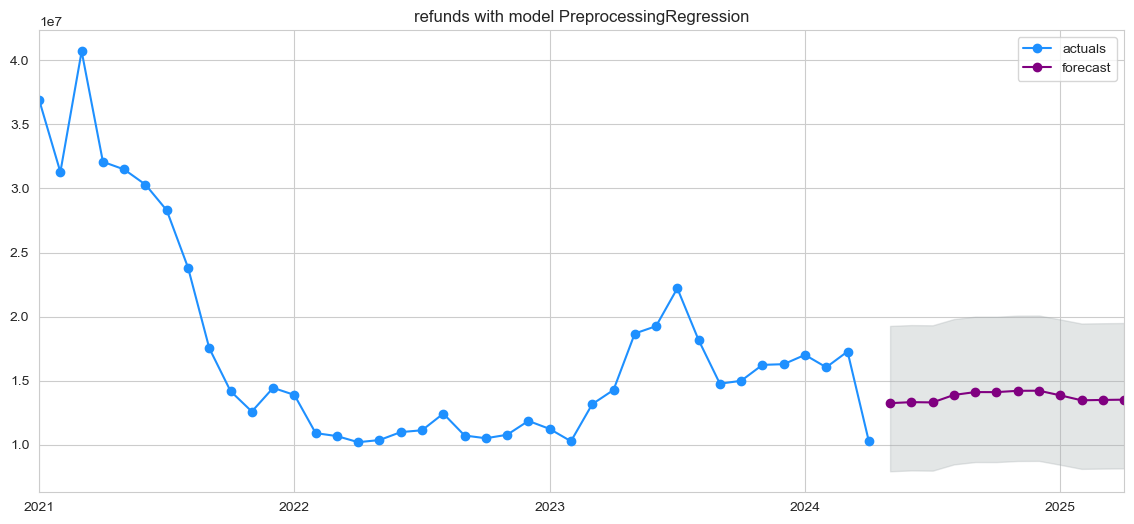

In [6]:
prediction.plot(model.df_wide_numeric, 
                series = model.df_wide_numeric.columns[0], 
                start_date = df.index.min(),
                figsize = (14,6), 
                colors = ['dodgerblue','purple'],
                marker = 'o'
               );

In [7]:
model

Initiated AutoTS object with best model: 
PreprocessingRegression
{'fillna': None, 'transformations': {}, 'transformation_params': {}}
{'window_size': 5, 'max_history': None, 'one_step': True, 'normalize_window': False, 'processed_y': False, 'transformation_dict': {'fillna': None, 'transformations': {}, 'transformation_params': {}}, 'datepart_method': 'simple_2', 'regression_type': None, 'regression_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'colsample_bylevel': 0.54, 'learning_rate': 0.0125, 'max_depth': 11, 'min_child_weight': 0.0127203, 'n_estimators': 319}}}
Validation: 0, 1, 2
SMAPE: 7.133946614919066, 7.133946614919066, 7.133946614919066
MAE: 843348.8499999997, 843348.8499999997, 843348.8499999997
SPL: 0.11821207494460677, 0.11821207494460677, 0.11821207494460677

In [8]:
print('Mean Absolute Error | MAE   = 1/n * Σ|actual - predicted|')
print('Symmetric MAPE      | SMAPE = 100 / n * Σ[2 * |actual - predicted| / (|actual| + |predicted|)]')
print('Scaled Pinball Loss | SPL   = 1/n * Σ[τ * (|actual - predicted|) if actual >= predicted else (1-τ) * (|actual - predicted|)]')

Mean Absolute Error | MAE   = 1/n * Σ|actual - predicted|
Symmetric MAPE      | SMAPE = 100 / n * Σ[2 * |actual - predicted| / (|actual| + |predicted|)]
Scaled Pinball Loss | SPL   = 1/n * Σ[τ * (|actual - predicted|) if actual >= predicted else (1-τ) * (|actual - predicted|)]


In [9]:
model_results = model.results()
validation_results = model.results('validation')
model_results.Model.unique().tolist()

['ARIMA',
 'AverageValueNaive',
 'DatepartRegression',
 'ETS',
 'GLM',
 'GLS',
 'LastValueNaive',
 'SeasonalNaive',
 'UnobservedComponents',
 'ConstantNaive',
 'FBProphet',
 'ARDL',
 'UnivariateMotif',
 'Theta',
 'UnivariateRegression',
 'ARCH',
 'SeasonalityMotif',
 'FFT',
 'KalmanStateSpace',
 'PreprocessingRegression',
 'MLEnsemble',
 'NeuralProphet',
 'MetricMotif']

In [10]:
prediction.forecast.astype(int)

,refunds
2024-05-01,13247783
2024-06-01,13327822
2024-07-01,13306547
2024-08-01,13889643
2024-09-01,14112516
2024-10-01,14108944
2024-11-01,14211539
2024-12-01,14219643
2025-01-01,13857439
2025-02-01,13471761
